# Loan Approval Prediction

### Problem Statement:

#### Overview
Loan approval is a crucial aspect of the financial sector, influencing both customer satisfaction and organizational profitability. Financial institutions strive to ensure that loans are granted to eligible individuals while minimizing risk. The traditional approach to evaluating loan applications can be time-consuming and prone to bias, making automation a valuable solution.

#### The Problem
Organizations handling loan applications require a system to accurately predict loan approval based on applicant data. This data includes attributes such as income, employment status, credit history, and other demographic and financial details. Automating this process will not only enhance decision-making efficiency but also allow institutions to focus on high-potential applicants, reducing operational delays and optimizing resource allocation.

### Dataset Description:

| **Variable**           | **Description**                                           |
|-------------------------|-----------------------------------------------------------|
| **Loan_ID**            | Unique identifier for each loan application               |
| **Gender**             | Gender of the applicant (Male/Female)                     |
| **Married**            | Marital status of the applicant (Yes/No)                  |
| **Dependents**         | Number of dependents the applicant has                    |
| **Education**          | Education level of the applicant (Graduate/Undergraduate) |
| **Self_Employed**      | Employment type (Self-Employed/Not Self-Employed)         |
| **ApplicantIncome**    | Applicant's monthly income                                |
| **CoapplicantIncome**  | Co-applicant's monthly income, if applicable              |
| **LoanAmount**         | Requested loan amount (in thousands)                      |
| **Loan_Amount_Term**   | Loan repayment duration (in months)                       |
| **Credit_History**     | Creditworthiness indicator based on historical data       |
| **Property_Area**      | Location category of the applicant's property             |
| **Loan_Status**        | Final loan approval status (Approved/Not Approved)        |

### Objective:
The objective of this project is to develop a predictive model to streamline loan approval processes. By leveraging machine learning techniques like Decision Trees, Random Forest, and Logistic Regression, the model aims to accurately predict loan approval outcomes. This will enable financial institutions to improve efficiency, reduce processing times, and enhance customer experiences.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("test_.csv")

train.head()

print(train.shape)

(1212, 13)


In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
print(test.head())
print("-"*40)
print(f"Test data shape: {test.shape}")


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN     

In [5]:
# df=train.drop("Loan_Status",axis=1)
df=train
# df=pd.concat([train_drop,test],axis=0)
df.shape

(1212, 13)

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
1208,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
1209,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
1210,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


***Check if there is any missing value in any column***

In [7]:
df.isnull().mean()

Loan_ID              0.000000
Gender               0.010726
Married              0.002475
Dependents           0.022277
Education            0.000000
Self_Employed        0.026403
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035479
Loan_Amount_Term     0.023102
Credit_History       0.081683
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
print("Number of duplicated index:",df.index.duplicated().sum())

Number of duplicated index: 0


In [9]:
print(df.duplicated().sum())


520


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, 0 to 1208
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            692 non-null    object 
 1   Gender             679 non-null    object 
 2   Married            689 non-null    object 
 3   Dependents         677 non-null    object 
 4   Education          692 non-null    object 
 5   Self_Employed      660 non-null    object 
 6   ApplicantIncome    692 non-null    int64  
 7   CoapplicantIncome  692 non-null    float64
 8   LoanAmount         667 non-null    float64
 9   Loan_Amount_Term   676 non-null    float64
 10  Credit_History     634 non-null    float64
 11  Property_Area      692 non-null    object 
 12  Loan_Status        692 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 75.7+ KB


In [14]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             5
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [15]:
for col in df.columns:
  if df[col].dtype=="object" and col!='Loan_ID':
    print(f"categories in {col} :{df[col].unique()}")

categories in Gender :['Male' 'Female' nan]
categories in Married :['No' 'Yes' nan]
categories in Dependents :['0' '1' '2' '3+' nan '3']
categories in Education :['Graduate' 'Not Graduate']
categories in Self_Employed :['No' 'Yes' nan]
categories in Property_Area :['Urban' 'Rural' 'Semiurban']
categories in Loan_Status :['Y' 'N']


Dropping unnecesary columns-> Loan_ID

In [16]:
df.drop("Loan_ID", inplace=True, axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
1179,Male,No,0,Graduate,Yes,3182,2917.0,161.0,360.0,1.0,Urban,Y
1198,Female,No,3,Graduate,Yes,416,41667.0,350.0,180.0,NaN,Urban,N
1199,Male,Yes,0,Not Graduate,Yes,2894,2792.0,155.0,360.0,1.0,Rural,Y
1200,Male,Yes,3,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y


In [17]:
# df["Total_Income"]=df["ApplicantIncome"]+df["CoapplicantIncome"]

In [18]:
# df["Average_income"]=df["Total_Income"]/2


In [19]:
df.describe().style.background_gradient(cmap="cubehelix")

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,692.000000,692.000000,667.000000,676.000000,634.000000
mean,5568.257225,1643.942081,148.385307,340.739645,0.840694
std,6980.714090,3212.294632,88.032873,66.088495,0.366250
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2917.000000,0.000000,100.000000,360.000000,1.000000
50%,3824.500000,1125.500000,128.000000,360.000000,1.000000
75%,5746.000000,2287.750000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# EDA

**Now Let's Start Visualizing the data and get some insights from the data**

In [20]:
df.groupby(["Loan_Amount_Term"])["Loan_Status"].value_counts(normalize=True)*100

Loan_Amount_Term  Loan_Status
12.0              Y              100.000000
36.0              N              100.000000
60.0              Y              100.000000
84.0              Y               75.000000
                  N               25.000000
120.0             Y              100.000000
180.0             Y               65.454545
                  N               34.545455
240.0             Y               75.000000
                  N               25.000000
300.0             Y               57.142857
                  N               42.857143
360.0             Y               69.860627
                  N               30.139373
480.0             N               56.250000
                  Y               43.750000
Name: proportion, dtype: float64

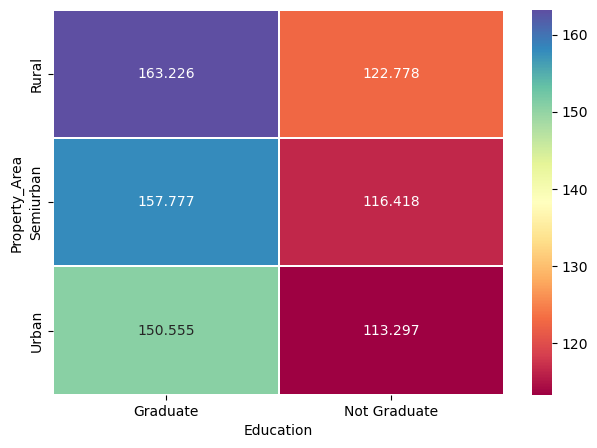

In [21]:
fig=plt.figure(figsize=(16,5))
gs=fig.add_gridspec(1,2,width_ratios=[1,1])


ax1=fig.add_subplot(gs[0,0])
x=df.pivot_table(index="Property_Area", columns="Education",values="LoanAmount", aggfunc="mean")
sns.heatmap(x,linewidths=0.2,annot=True,fmt=".3f",cmap="Spectral")



plt.show()

*1. Graduates consistently have higher average loan amounts than non-graduates across all property areas.*

*2. Rural areas show the highest average loan amounts for both education levels, while urban areas have the lowest.*  


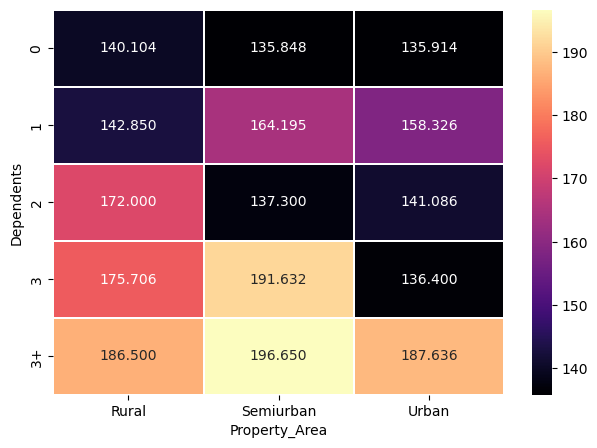

In [22]:
fig=plt.figure(figsize=(16,5))
gs=fig.add_gridspec(1,2,width_ratios=[1,1])


ax1=fig.add_subplot(gs[0,0])
y=df.pivot_table(index="Dependents", columns="Property_Area",values="LoanAmount", aggfunc="mean")
sns.heatmap(y,linewidths=0.2,annot=True,fmt=".3f",cmap="magma")


plt.show()

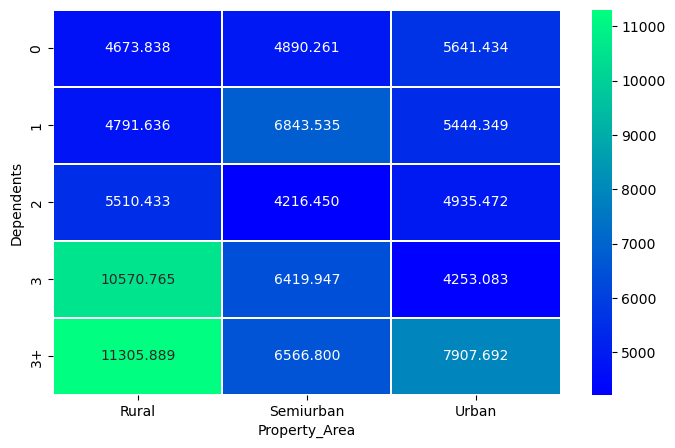

In [23]:
fig=plt.figure(figsize=(18,5))
gs=fig.add_gridspec(1,2,width_ratios=[1,1])


ax1=fig.add_subplot(gs[0,0])
y=df.pivot_table(index="Dependents", columns="Property_Area",values="ApplicantIncome", aggfunc="mean")
sns.heatmap(y,linewidths=0.2,annot=True,fmt=".3f",cmap="winter")



plt.show()

*1. Applicant income increases with the number of dependents across all property areas, with rural areas showing the highest average income for larger families (3 or more dependents).*  

*2. Semiurban areas generally have lower average applicant incomes compared to rural and urban areas for most dependent categories.*  


In [24]:
print(df["Dependents"].value_counts())
print("-"*40)
for i in df["Dependents"].unique():
    if pd.notna(i):  
        print(f"Average applicant's income who has {i} dependents is: ", 
              df[df["Dependents"] == i]["ApplicantIncome"].mean())

Dependents
0     364
1     108
2     106
3+     51
3      48
Name: count, dtype: int64
----------------------------------------
Average applicant's income who has 0 dependents is:  5053.89010989011
Average applicant's income who has 1 dependents is:  5868.472222222223
Average applicant's income who has 2 dependents is:  4826.867924528302
Average applicant's income who has 3+ dependents is:  8581.21568627451
Average applicant's income who has 3 dependents is:  7348.3125


In [25]:
print(df["Dependents"].value_counts())
print("-"*40)
for i in df["Dependents"].unique():
    if pd.notna(i):  
        print(f"Average CoapplicantIncome's income who has {i} dependents is: ", 
              df[df["Dependents"] == i]["CoapplicantIncome"].mean())

Dependents
0     364
1     108
2     106
3+     51
3      48
Name: count, dtype: int64
----------------------------------------
Average CoapplicantIncome's income who has 0 dependents is:  1601.5003296726372
Average CoapplicantIncome's income who has 1 dependents is:  1411.648148148148
Average CoapplicantIncome's income who has 2 dependents is:  1694.1679244132076
Average CoapplicantIncome's income who has 3+ dependents is:  2024.313725490196
Average CoapplicantIncome's income who has 3 dependents is:  2150.8333333333335


In [26]:
print(df["Property_Area"].value_counts())

for i in df["Property_Area"].unique():
  print(f"Average Applicant income of the {i} residents :",df[df["Property_Area"]==i]["ApplicantIncome"].mean())

Property_Area
Semiurban    262
Urban        224
Rural        206
Name: count, dtype: int64
Average Applicant income of the Urban residents : 5546.799107142857
Average Applicant income of the Rural residents : 5873.626213592233
Average Applicant income of the Semiurban residents : 5346.503816793893


In [27]:
print(df["Property_Area"].value_counts())

for i in df["Property_Area"].unique():
  print(f"Average CoApplicant income of the {i} residents :",df[df["Property_Area"]==i]["CoapplicantIncome"].mean())

Property_Area
Semiurban    262
Urban        224
Rural        206
Name: count, dtype: int64
Average CoApplicant income of the Urban residents : 1813.3026785169643
Average CoApplicant income of the Rural residents : 1585.6753398099029
Average CoApplicant income of the Semiurban residents : 1544.9580152671756


**Now we will analyze the Loan Approval Rate with respect to the column Gender**

In [28]:
df["Credit_History"].value_counts()

Credit_History
1.0    533
0.0    101
Name: count, dtype: int64

In [29]:
print(df.groupby(['Credit_History'])['Loan_Status'].value_counts(normalize=True)*100)


Credit_History  Loan_Status
0.0             N              91.089109
                Y               8.910891
1.0             Y              79.924953
                N              20.075047
Name: proportion, dtype: float64


**It is evident that Credit History plays a significant role in loan approval. Individuals with a good credit history have approximately an 80% approval rate, whereas those with a poor credit history face significantly lower chances of loan approval. This highlights the importance of maintaining a strong credit record for increasing loan eligibility.**

In [30]:
df.shape

(692, 12)

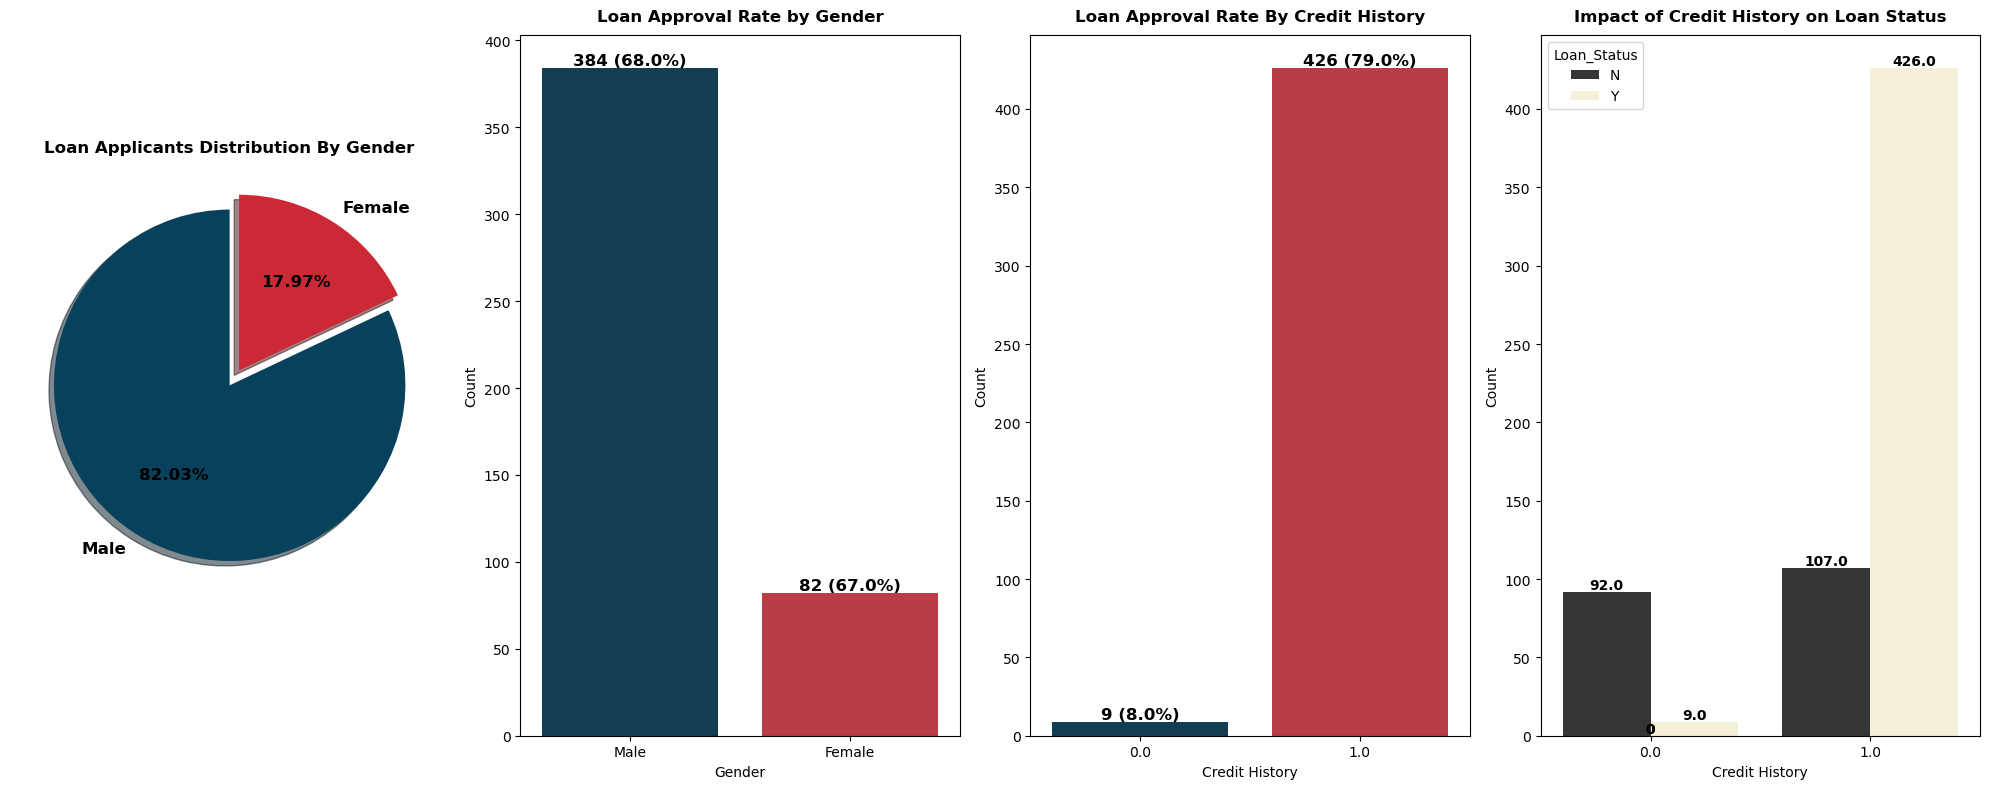

In [31]:
plt.figure(figsize=(20, 8))  # Increased figure size for better spacing and readability

# Subplot 1: Loan Applicants Distribution by Gender (Pie Chart)
plt.subplot(1, 4, 1)
plt.title("Loan Applicants Distribution By Gender", fontweight="heavy", size=12, pad=10)
plt.pie(
    df["Gender"].value_counts(),
    labels=df["Gender"].value_counts().index,
    autopct="%.2f%%",
    textprops={"fontweight": "heavy", "size": 12},
    shadow=True,
    colors=["#08415C", "#CC2936"],
    explode=[0, 0.1],
    startangle=90
)

# Subplot 2: Loan Approval Rate by Gender (Bar Plot)
plt.subplot(1, 4, 2)
plt.title("Loan Approval Rate by Gender", fontweight="heavy", size=12, pad=10)
approve_df = df[df["Loan_Status"] == "Y"]
gender_value_approve = approve_df["Gender"].value_counts()
actual_gender_value = df["Gender"].value_counts()
approval_rate = np.floor((gender_value_approve / actual_gender_value) * 100).values
sns.barplot(x=gender_value_approve.index, y=gender_value_approve.values, palette=["#08415C", "#CC2936"])
for i, v in enumerate(gender_value_approve.values):
    plt.text(
        i,
        v,
        f"{v} ({approval_rate[i]}%)",
        ha="center",
        va="bottom",
        fontweight="heavy",
        size=12
    )
plt.xlabel("Gender")
plt.ylabel("Count")

# Subplot 3: Loan Approval Rate by Credit History (Bar Plot)
plt.subplot(1, 4, 3)
plt.title("Loan Approval Rate By Credit History", fontweight="heavy", size=12, pad=10)
approve_df_credit = df[df["Loan_Status"] == "Y"]
credit_approve = approve_df_credit["Credit_History"].value_counts().sort_index()
credit_value = df["Credit_History"].value_counts().sort_index()
credit_rate = np.floor((credit_approve / credit_value) * 100).values
sns.barplot(x=credit_approve.index, y=credit_approve.values, palette=["#08415C", "#CC2936"])
for i, v in enumerate(credit_approve.values):
    plt.text(
        i,
        v,
        f"{v} ({credit_rate[i]}%)",
        ha="center",
        va="bottom",
        fontweight="heavy",
        size=12
    )
plt.xlabel("Credit History")
plt.ylabel("Count")

# Subplot 4: Impact of Credit History on Loan Status (Count Plot)
plt.subplot(1, 4, 4)
sns.countplot(x="Credit_History", hue="Loan_Status", data=df, palette=["#353535", "#FAF4D3"])
plt.title("Impact of Credit History on Loan Status", fontweight="bold", size=12, pad=10)
plt.xlabel("Credit History")
plt.ylabel("Count")
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(
        f"{height}",
        (p.get_x() + p.get_width() / 2., height),
        ha="center",
        va="bottom",
        fontweight="heavy",
        size=10
    )

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**1.Gender Distribution of Loan Applicants:
The majority of loan applicants are male, accounting for 81.40%, whereas females make up only 18.60% of the total applicants. This highlights a significant gender disparity in loan applications.**

**2.Loan Approval Rate by Gender:
Despite the large difference in the number of applicants, the loan approval rate for females (66%) is relatively close to that of males (60%). This suggests that gender does not significantly influence loan approval decisions.**

**3.Impact of Credit History on Loan Approval:
Applicants with a credit history of 1.0 (good credit history) have a much higher loan approval rate (79%) compared to those with a credit history of 0.0 (poor credit history), who have an approval rate of only 8%. This indicates that a strong credit history is a key determinant in loan approval decisions.**

**4.Overall Impact of Credit History:
A closer look shows that the majority of approved loans (579) are associated with applicants having good credit history (1.0), while only a small number (43) are approved for applicants with poor credit history (0.0). This further underscores the importance of maintaining a positive credit record.**

**5.Insights on Loan Denials:
Among applicants with poor credit history (0.0), a significantly higher proportion are denied loans compared to those with good credit history. This reflects the higher risk perceived by lenders for individuals with poor credit records.**

**Plotting the Pair plot**

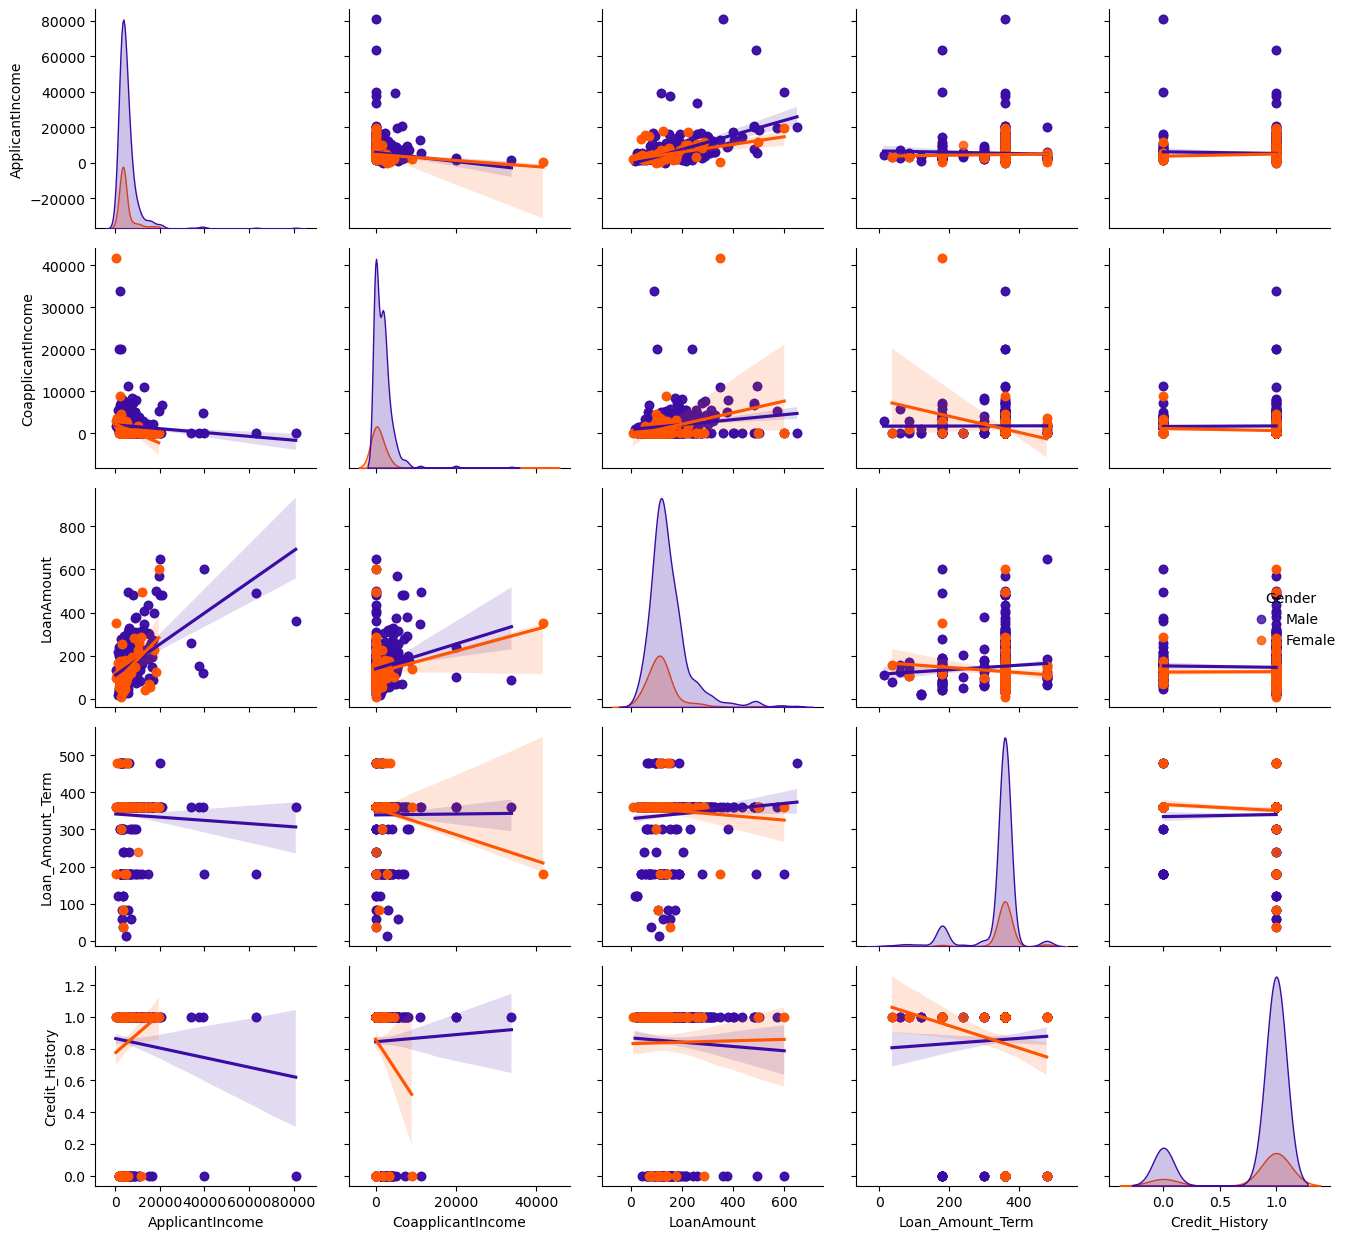

In [274]:
sns.pairplot(df,hue="Gender",kind="reg",palette=["#3a0ca3","#ff5400"])
plt.grid()
plt.tight_layout()
plt.show()

**Now let us see the distribution of the ApplicantIncome, CoapplicantIncome, LoanAmount**

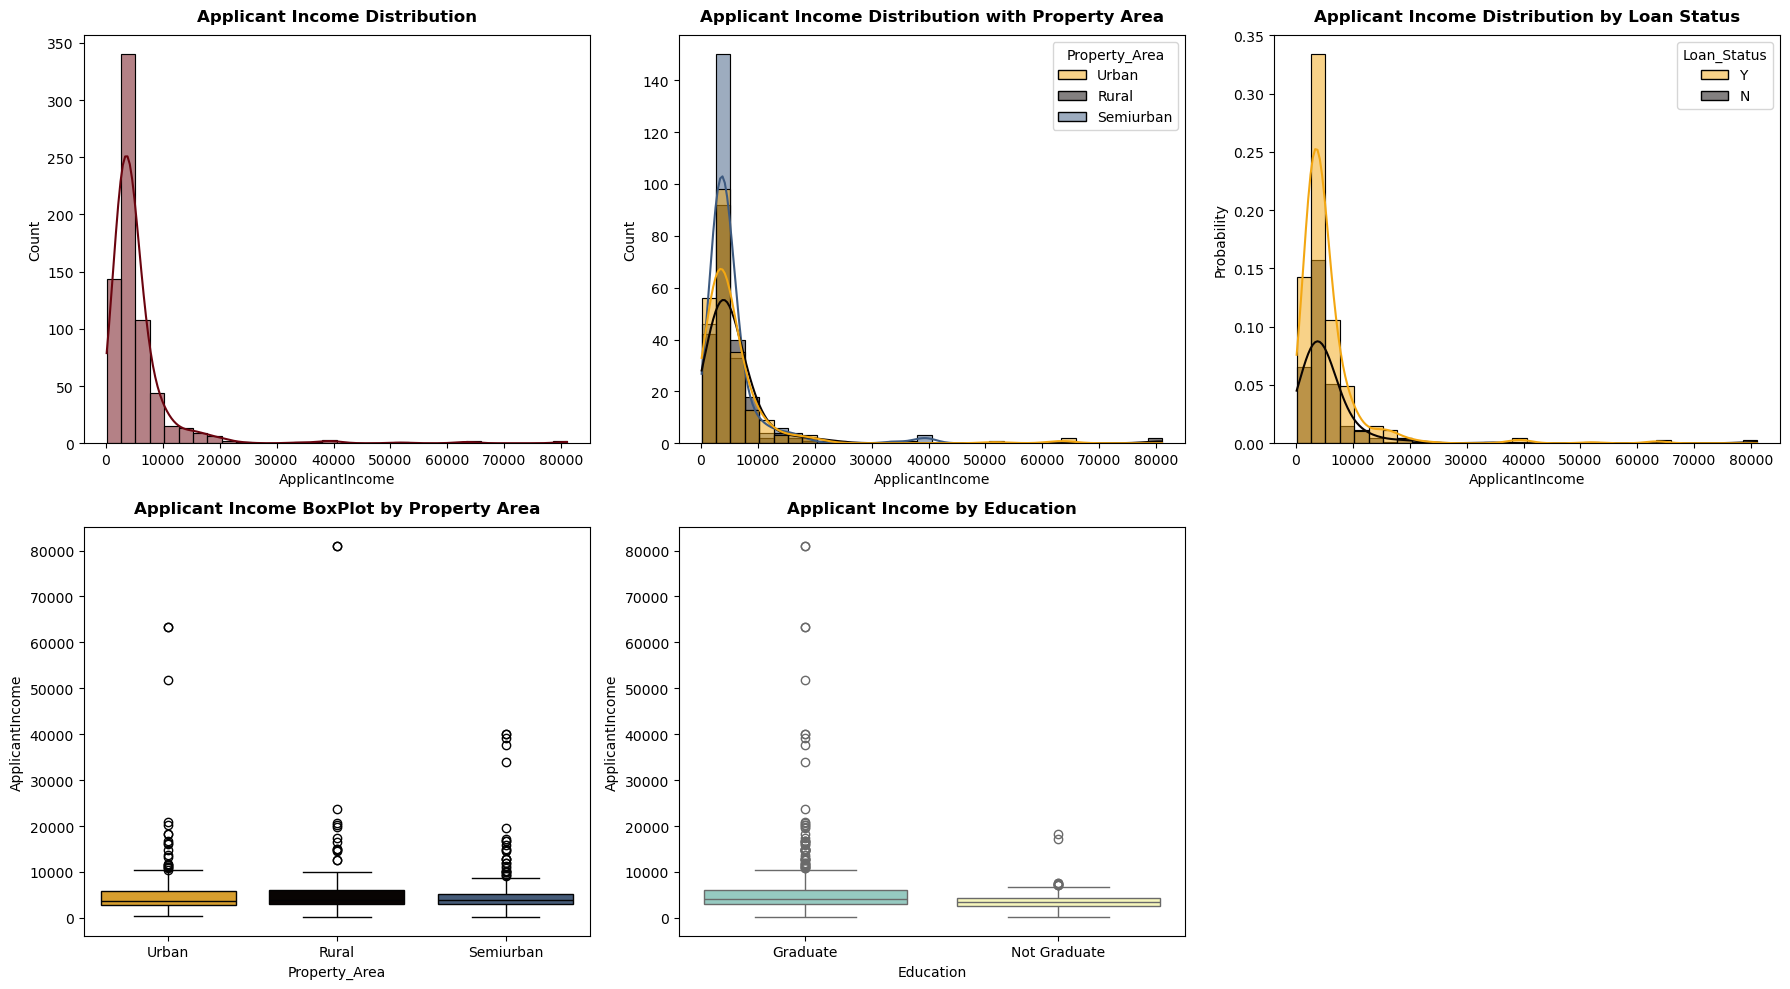

In [32]:
plt.figure(figsize=(18, 10))  # Increase figure size for better spacing

# Subplot 1: Applicant Income Distribution
plt.subplot(2, 3, 1)  # Change to 2 rows and 3 columns for better space
plt.title("Applicant Income Distribution", fontweight="bold", size=12, pad=10)
sns.histplot(x="ApplicantIncome", data=df, color="#6a040f", bins=32, kde=True)

# Subplot 2: Applicant Income Distribution by Property Area
plt.subplot(2, 3, 2)
sns.histplot(x="ApplicantIncome", data=df, bins=32, kde=True, hue="Property_Area",
             palette=["#F3A712", "#090302", "#3d5a80"])
plt.title("Applicant Income Distribution with Property Area", fontweight="bold", size=12, pad=10)

# Subplot 3: Applicant Income Distribution by Loan Status
plt.subplot(2, 3, 3)
sns.histplot(x="ApplicantIncome", data=df, bins=32, kde=True, stat="probability", hue="Loan_Status",
             palette=["#F3A712", "#090302", "#3d5a80"])
plt.title("Applicant Income Distribution by Loan Status", fontweight="bold", size=12, pad=10)

# Subplot 4: Boxplot of Applicant Income by Property Area
plt.subplot(2, 3, 4)
sns.boxplot(x="Property_Area", y="ApplicantIncome", data=df,
            palette=["#F3A712", "#090302", "#3d5a80"])
plt.title("Applicant Income BoxPlot by Property Area", fontweight="bold", size=12, pad=10)

# Subplot 5: Boxplot of Applicant Income by Education
plt.subplot(2, 3, 5)
sns.boxplot(x="Education", y="ApplicantIncome", data=df, palette="Set3")
plt.title("Applicant Income by Education", fontweight="bold", size=12, pad=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## Conclusions and Insights from Applicant Income Distribution Analysis

### 1. Overall Applicant Income Distribution
- The applicant income distribution is heavily skewed to the right, indicating that most applicants have lower incomes, with a few outliers having significantly higher incomes.

### 2. Income Distribution by Property Area
- The applicant income distributions for **Urban**, **Rural**, and **Semiurban** areas follow a similar trend, showing a right-skewed pattern.
- The peak income values are slightly more concentrated for **Rural** and **Semiurban** areas compared to **Urban** areas, indicating differences in income spread across these regions.

### 3. Income Distribution by Loan Status
- Applicants with a loan approved (**Y**) have a similar income distribution to those whose loans were not approved (**N**).
- The density for lower-income ranges is slightly higher for applicants with approved loans, suggesting the approval process is not solely based on higher incomes.

### 4. Box Plot of Applicant Income by Property Area
- The median income is fairly consistent across **Urban**, **Rural**, and **Semiurban** areas, but outliers are present in all categories.
- **Urban** areas appear to have a slightly higher number of extreme outliers compared to **Rural** and **Semiurban** areas.

### 5. Box Plot of Applicant Income by Education
- **Graduates** generally have a wider income range compared to **Non-graduates**, as evidenced by the spread of the box plot.
- There are significantly more outliers among graduates, indicating that higher education may lead to variability in income levels.

---

### Key Insights
- Most applicants fall in the low-income category across all groups.
- Property area and education level do not drastically change income trends, although variability is observed.
- Loan approval does not exclusively favor higher-income applicants, suggesting additional factors are considered in the approval process.


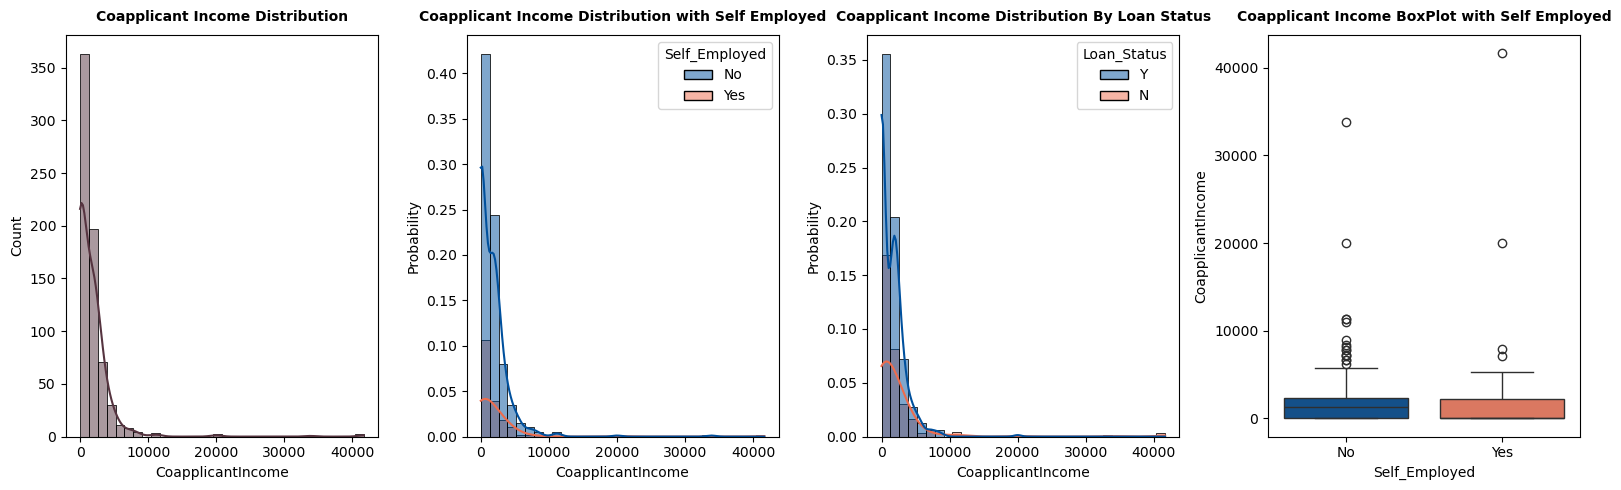

In [33]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plt.title("Coapplicant Income Distribution", fontweight="bold",size=10,pad=10)
sns.histplot(x="CoapplicantIncome",data=df,color="#563440",bins=32,kde=True)

plt.subplot(1,4,2)
sns.histplot(x="CoapplicantIncome",data=df,bins=32,kde=True,stat="probability",hue="Self_Employed",palette=["#00509d","#ee6c4d"])
plt.title("Coapplicant Income Distribution with Self Employed", fontweight="bold", size=10, pad=10)

plt.subplot(1,4,3)
sns.histplot(x="CoapplicantIncome",data=df,bins=32,kde=True,stat="probability",hue="Loan_Status",palette=["#00509d","#ee6c4d"])
plt.title("Coapplicant Income Distribution By Loan Status", fontweight="bold", size=10, pad=10)

plt.subplot(1,4,4)
sns.boxplot(x="Self_Employed",y="CoapplicantIncome",data=df, palette=["#00509d","#ee6c4d"])
plt.title("Coapplicant Income BoxPlot with Self Employed",fontweight="bold", size=10, pad=10)
plt.tight_layout()

plt.show()

**1.Just like Applicant Income the coapplicant income distribution is also right skewed**

**2.Here also there are many outliers**

**3.The Chance of getting the Loan Approved is higher for those who have Coapplicant Income is higher**

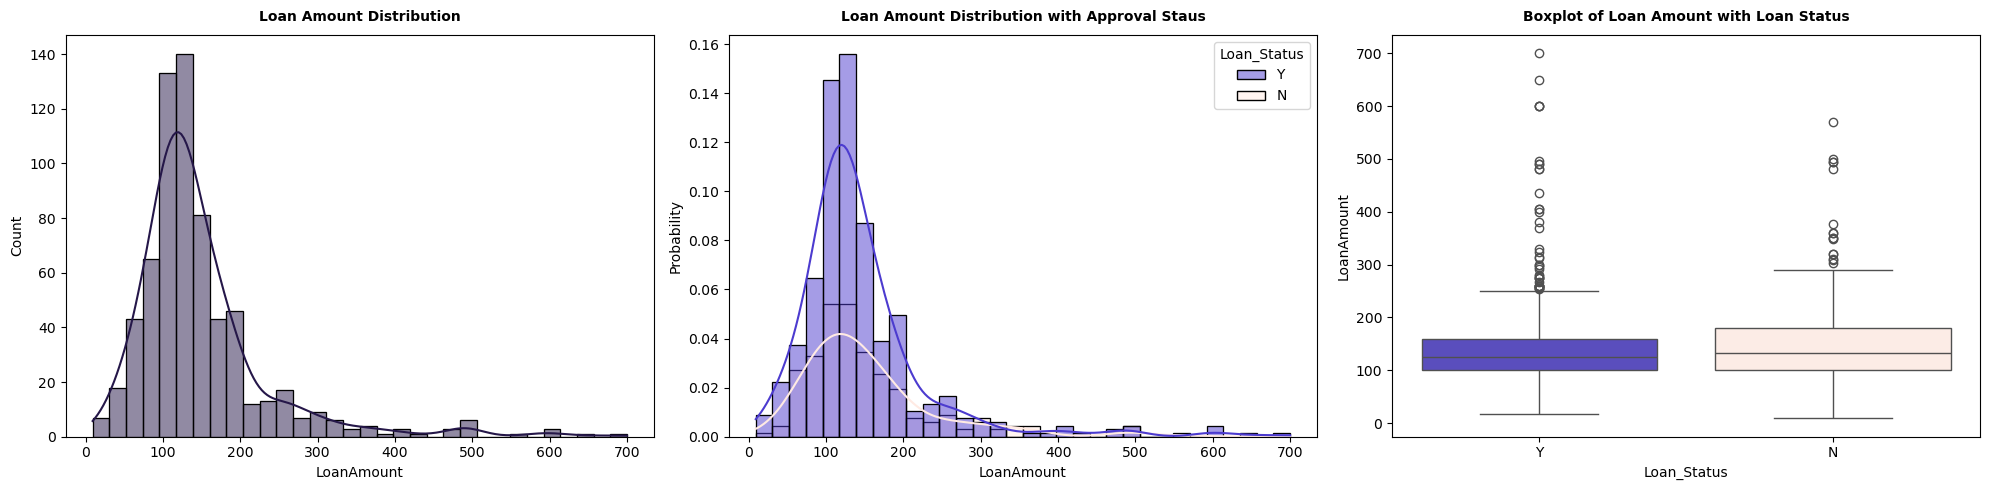

In [34]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title("Loan Amount Distribution", fontweight="bold",size=10,pad=10)
sns.histplot(x="LoanAmount",data=df,color="#251749",bins=32,kde=True)

plt.subplot(1,3,2)
plt.title("Loan Amount Distribution with Approval Staus", fontweight="bold", size=10, pad=10)
sns.histplot(x="LoanAmount",data=df,bins=32,kde=True,stat="probability",hue="Loan_Status",palette=["#4C3BCF","#FFEAE3"])

plt.subplot(1,3,3)
plt.title("Boxplot of Loan Amount with Loan Status", fontweight="bold",size=10,pad=10)
sns.boxplot(x="Loan_Status", y="LoanAmount", data =df,palette=["#4C3BCF","#FFEAE3"])
plt.tight_layout()

plt.show()

**Observations:**


*   Here we can see that the distribution of Loan amount is sort of Normal Distribution
*   But there are also many outliers which need to be solved by using transformation

*   Another thing To Note is that if the Loan Amount is small Then chance of getting the Loan approved is higher



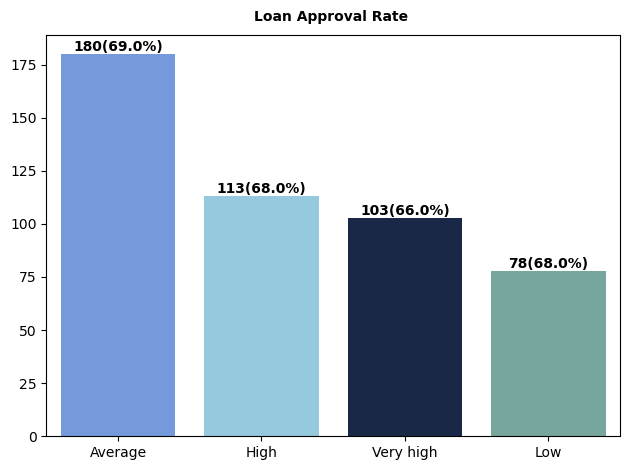

In [38]:
# plt.subplot(1,3,3)
bin=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
new_df=df.copy()
new_df['ApplicantIncome_bin']=pd.cut(new_df['ApplicantIncome'],bins=bin,labels=group)


approve_df=new_df[new_df["Loan_Status"]=="Y"]
total_income_value_Approve=approve_df["ApplicantIncome_bin"].value_counts()
actual_total_income_value=new_df["ApplicantIncome_bin"].value_counts()
approval_rate=np.floor((total_income_value_Approve/actual_total_income_value)*100).values
sns.barplot(x=total_income_value_Approve.index.tolist(),y=total_income_value_Approve.values,palette=['#6495ED', '#87CEEB', "#11264e","#6faea4"])
plt.title("Loan Approval Rate ",fontweight="bold",size=10,pad=10)
for i,v in enumerate(total_income_value_Approve.values):
  plt.text(i,v,str(v)+"("+str(approval_rate[i])+"%)",ha="center",va="bottom",fontweight="heavy",size=10)

plt.tight_layout()

plt.show()

**Observation:**

* More The Income More The chance of getting the loan approved

**Now we will analyze the Loan Approval Rate with respect to the column Property Area**

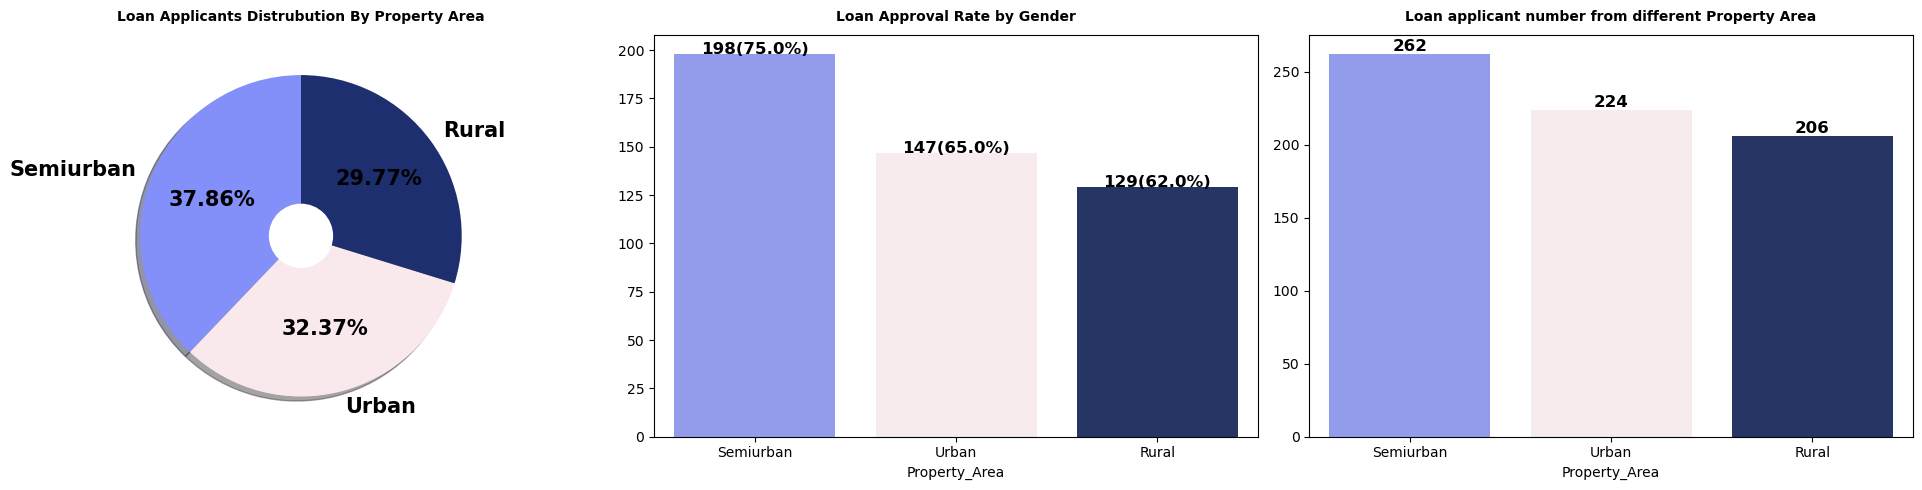

In [39]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title("Loan Applicants Distrubution By Property Area", fontweight="heavy", size=10, pad=10)
plt.pie(df["Property_Area"].value_counts(),labels=df["Property_Area"].value_counts().index, autopct="%.2f%%",textprops={"fontweight":"heavy","size":15},shadow=True,colors=["#8390FA","#F9E9EC","#1D2F6F"],startangle=90)
center_small_circle=plt.Circle((0,0),0.2,fc="white")
fig=plt.gcf()
fig.gca().add_artist(center_small_circle)

plt.subplot(1,3,2)
plt.title("Loan Approval Rate by Gender",fontweight="heavy", size=10,pad=10)
approve_df=df[df["Loan_Status"]=="Y"]
property_value_Approve=approve_df["Property_Area"].value_counts()
actual_property_value=df["Property_Area"].value_counts()
approval_rate=np.floor((property_value_Approve/actual_property_value)*100).values
sns.barplot(x=property_value_Approve.index,y=property_value_Approve.values,palette=["#8390FA","#F9E9EC","#1D2F6F"])
for i,v in enumerate(property_value_Approve.values):
  plt.text(i,v,str(v)+"("+str(approval_rate[i])+"%)",ha="center",fontweight="heavy",size=12)

plt.subplot(1,3,3)
plt.title("Loan applicant number from different Property Area",fontweight="heavy", size=10,pad=10)
sns.barplot(x=df["Property_Area"].value_counts().index,y=df["Property_Area"].value_counts().values,palette=["#8390FA","#F9E9EC","#1D2F6F"])
for i,v in enumerate(df["Property_Area"].value_counts().values):
  plt.text(i,v,str(v),ha="center",va="bottom",fontweight="heavy",size=12)

plt.tight_layout()
plt.show()

**Observations:**

**1. we can see that the loan approval rate of semiurban area people is higher than Urban area and rural Area People**

**2. The Number of loan applicants from semi urbban area is also higher than urban and rural area**

Now let us the relation between loan amount and Applicant Income

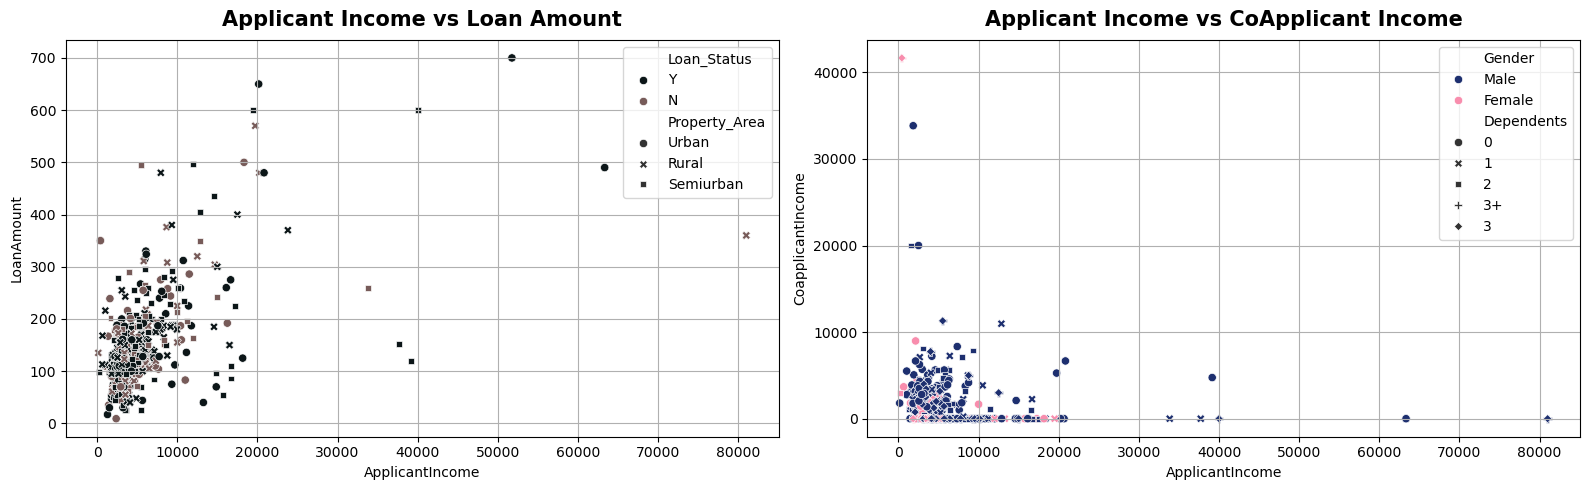

In [40]:
fig=plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.title("Applicant Income vs Loan Amount", fontweight="black",size=15,pad=10)
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=df,hue="Loan_Status", style="Property_Area",palette=["#0C1618","#775B59"])
plt.grid()

plt.subplot(1,2,2)

plt.title("Applicant Income vs CoApplicant Income", fontweight="black",size=15,pad=10)
sns.scatterplot(x="ApplicantIncome", y="CoapplicantIncome",data =df,hue="Gender",style="Dependents",palette=["#1D2F6F","#F88DAD"])

plt.grid()

plt.tight_layout()
plt.show()

**Observations:**

we can see that there is a sort of Linear relation between Applicant Income and Loan Amount

Now let us see the relation between Average Income with Genders

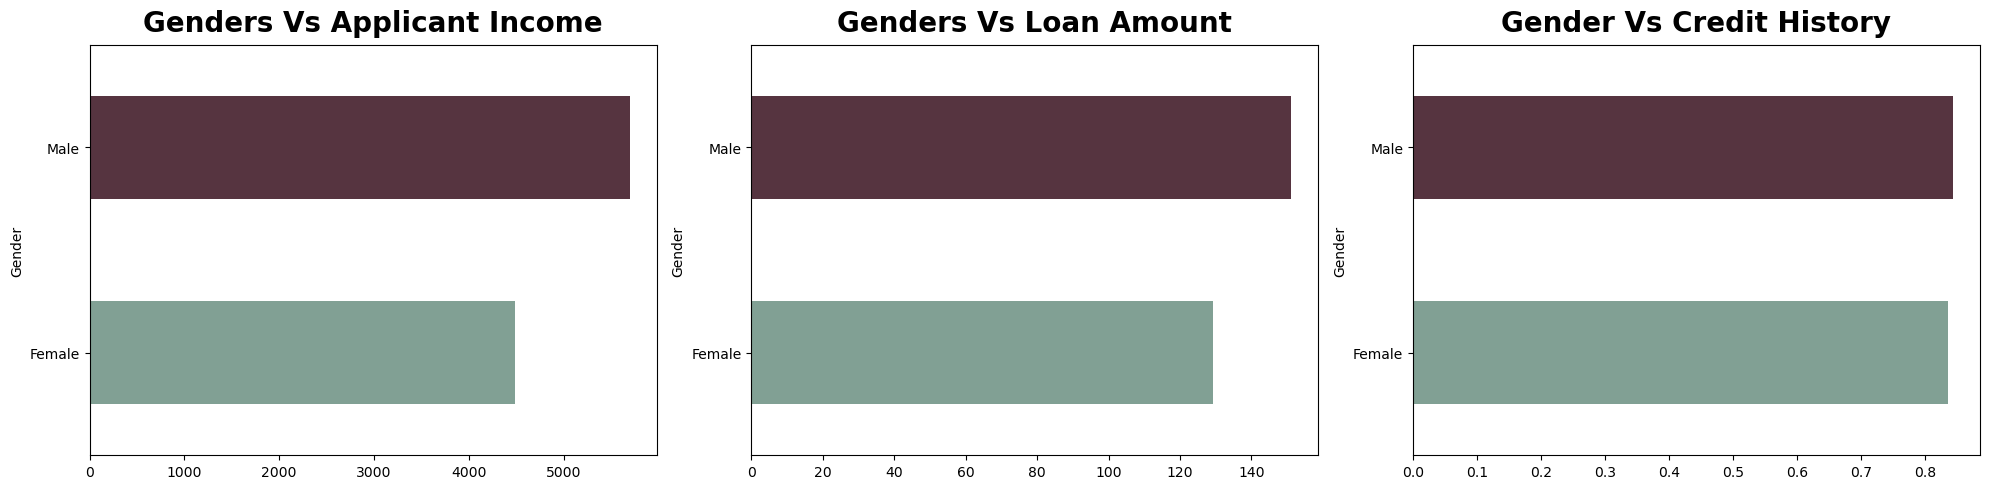

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title("Genders Vs Applicant Income",fontweight="heavy",size=20,pad=10)
grouped_gender_1=df.groupby("Gender")["ApplicantIncome"].mean()
grouped_gender_1.plot(kind='barh', ax=plt.gca(), color=[ "#81A094", "#563440"])


plt.subplot(1,3,2)
plt.title("Genders Vs Loan Amount",fontweight="heavy",size=20,pad=10)
grouped_gender_2=df.groupby("Gender")["LoanAmount"].mean()
grouped_gender_2.plot(kind='barh', ax=plt.gca(), color=["#81A094", "#563440"])

plt.subplot(1,3,3)
plt.title("Gender Vs Credit History", fontweight="heavy", size=20, pad=10)
grouped_gender_3=df.groupby("Gender")["Credit_History"].mean()
grouped_gender_3.plot(kind='barh', ax=plt.gca(), color=["#81A094", "#563440"])

plt.tight_layout()
plt.show()

**Observations**

1.Male **Outperformed** Female in terms of **Income**


2. The **average Loan Amount** of **Males** is also comaparatively **higher** than the **average Loan amount** of **Females**

Now let us see the Loan Approval rate with dependents

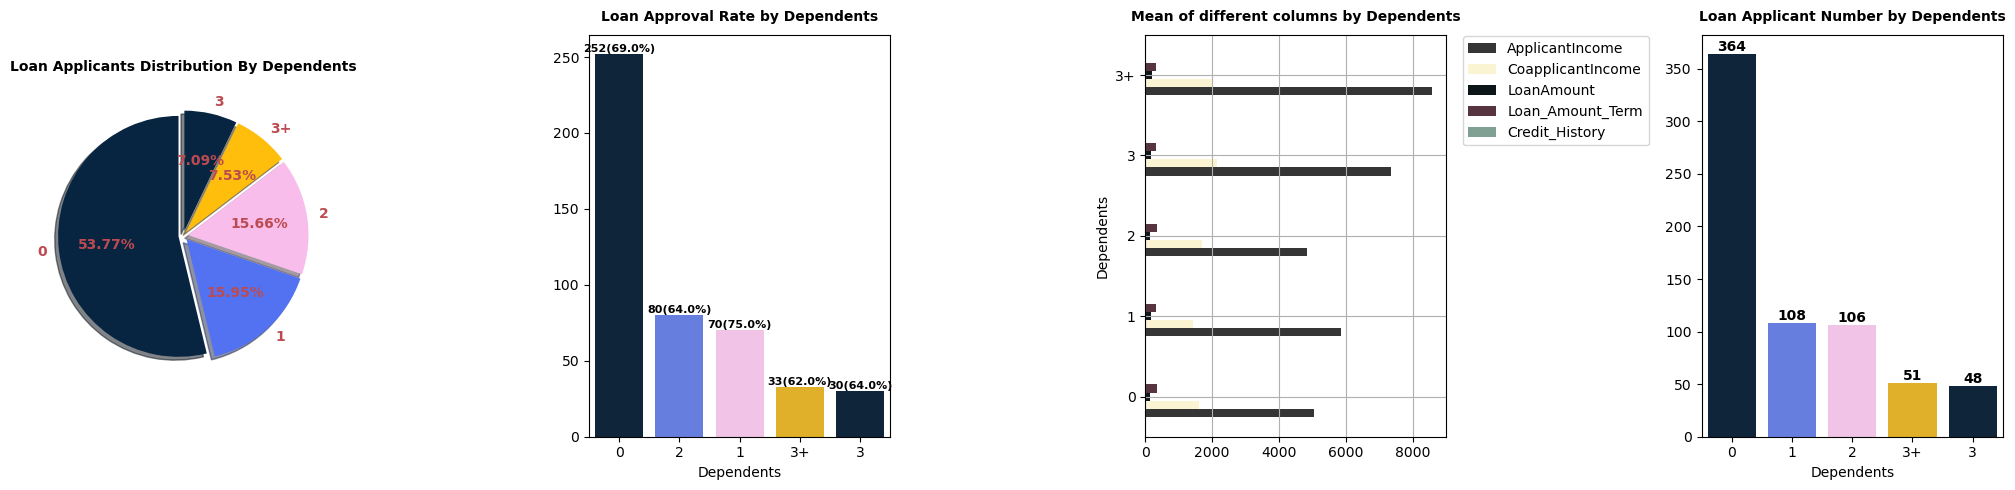

In [42]:
plt.figure(figsize=(20,5))

# Pie chart for Loan Applicants Distribution By Dependents
plt.subplot(1,4,1)
plt.title("Loan Applicants Distribution By Dependents", fontweight="heavy", size=10, pad=10)

# Get value counts for Dependents
dependents_count = df["Dependents"].value_counts()

# Create the explode list with the same length as the number of categories
explode_values = [0.04] * len(dependents_count)  # Adjust the explode values accordingly

# Plot the pie chart
plt.pie(dependents_count, labels=dependents_count.index, autopct="%.2f%%", textprops={"fontweight":"heavy", "size":10, "color":"#bc4b51"},
        shadow=True, startangle=90, explode=explode_values, colors=["#072541", "#5272F2", "#F8BDEB", "#ffbe0b"])

# Continue with the other plots...
plt.subplot(1,4,2)
plt.title("Loan Approval Rate by Dependents", fontweight="heavy", size=10, pad=10)

dependents_approve = df[df["Loan_Status"] == "Y"]["Dependents"].value_counts()
actual_dependents = df["Dependents"].value_counts()
approval_rate_dependents = np.floor((dependents_approve / actual_dependents) * 100).values
sns.barplot(x=dependents_approve.index, y=dependents_approve.values, palette=["#072541", "#5272F2", "#F8BDEB", "#ffbe0b"])

for i, v in enumerate(dependents_approve.values):
    plt.text(i, v, str(v) + "(" + str(approval_rate_dependents[i]) + "%)", ha="center", va="bottom", fontweight="heavy", size=8)

# Continue with the other subplots...
plt.subplot(1, 4, 3)
plt.title("Mean of different columns by Dependents", fontweight="heavy", size=10, pad=10)
Num_features = df.select_dtypes(include=["int64", "float64"]).columns
grouped_means = df.groupby('Dependents')[Num_features].mean()
grouped_means.plot(kind='barh', ax=plt.gca(), color=["#353535", "#FAF4D3", "#0C1618", "#563440", "#81A094", "#29339B", "#FF3A20"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.grid()

# Final subplot
plt.subplot(1, 4, 4)
plt.title("Loan Applicant Number by Dependents", fontweight="heavy", size=10, pad=10)
sns.barplot(x=df["Dependents"].value_counts().index, y=df["Dependents"].value_counts().values, palette=["#072541", "#5272F2", "#F8BDEB", "#ffbe0b"])

for i, v in enumerate(df["Dependents"].value_counts().values):
    plt.text(i, v, str(v), ha="center", va="bottom", fontweight="heavy", size=10)

plt.tight_layout()

plt.show()


**Observations:**


*   Those Loan Applicants who have Dependents More than 3 has the Most Income
*   Those Loan Applicants who have 1 dependent has Most Loan Approval Rate
*   Those Who Have No dependents are the Most who have applied for loan


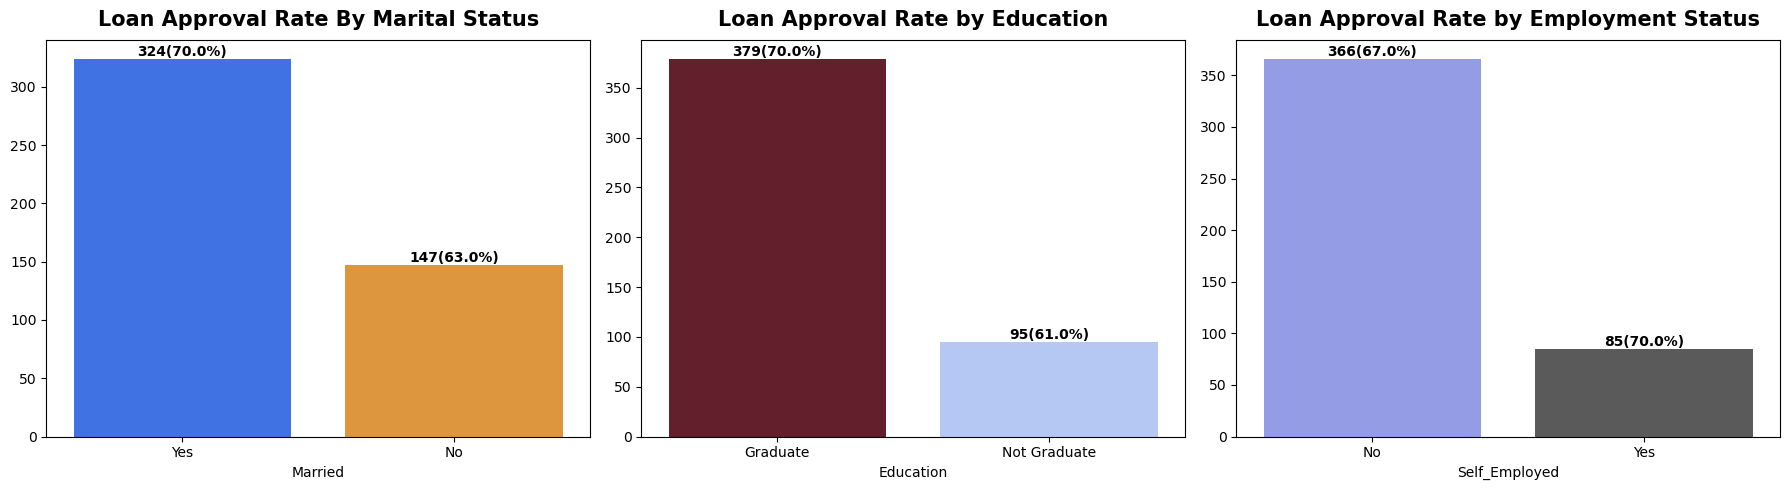

In [43]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
approve_df=df[df["Loan_Status"]=="Y"]
married_approve=approve_df["Married"].value_counts()
married_value=df["Married"].value_counts()
married_rate=np.floor((married_approve/married_value)*100).values
sns.barplot(x=married_approve.index,y=married_approve.values,palette=["#2667ff","#f79824"])
plt.title("Loan Approval Rate By Marital Status",fontweight="heavy",size=15,pad=10)
for i,v in enumerate(married_approve.values):
  plt.text(i,v,str(v)+"("+str(married_rate[i])+"%)",ha="center",va="bottom",fontweight="heavy",size=10)

plt.subplot(1,3,2)
education_approve=approve_df["Education"].value_counts()
education_value=df["Education"].value_counts()
education_rate=np.floor((education_approve/education_value)*100).values
sns.barplot(x=education_approve.index,y=education_approve.values,palette=["#6e1423","#abc4ff"])
plt.title("Loan Approval Rate by Education",fontweight="heavy",size=15,pad=10)
for i,v in enumerate(education_approve.values):
  plt.text(i,v,str(v)+"("+str(education_rate[i])+"%)",ha="center",va="bottom",fontweight="heavy",size=10)

plt.subplot(1,3,3)
employment_approve=approve_df["Self_Employed"].value_counts()
employment_value=df["Self_Employed"].value_counts()
employment_rate=np.floor((employment_approve/employment_value)*100).values
sns.barplot(x=employment_approve.index,y=employment_approve.values,palette=["#8691f4","#5a5a5a"])
plt.title("Loan Approval Rate by Employment Status",fontweight="heavy",size=15,pad=10)
for i,v in enumerate(employment_approve.values):
  plt.text(i,v,str(v)+"("+str(employment_rate[i])+"%)",ha="center",va="bottom",fontweight="heavy",size=10)


plt.tight_layout()
plt.show()

*

Now let us see the correlation between any Numeriocal Columns two columns


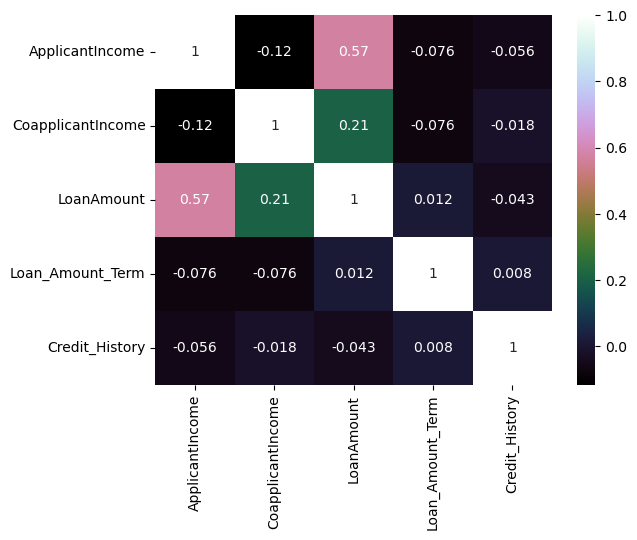

In [44]:
Num_features=df.select_dtypes(include=["int64","float64"]).columns
x=df[Num_features].corr()
sns.heatmap(x,annot=True,cmap="cubehelix")

plt.show()

# Feature Construction

**The primary objective here is to categorize customers based on key attributes such as their income levels, residential status, credit history, loan amounts, loan terms, and loan approval status.**

This grouping will help in better understanding customer profiles and identifying patterns or trends that influence loan approval decisions.

Now, I will define the clusters of customers by using the 'k-means' algorithm. To decide the proper number of clusters, I will first make use of the **elbow method**.

In [83]:
import sklearn

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score ,confusion_matrix,ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay,roc_auc_score, precision_score, recall_score,classification_report,make_scorer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from sklearn.base import TransformerMixin, BaseEstimator
# from sklearn.metrics import plot_roc_curve
import time

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,OrdinalEncoder,MinMaxScaler,FunctionTransformer
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn import set_config
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering


In [84]:
data=df.copy()

**Z-score Method**

In [85]:
def remove_outliers_z_score(df, col, threshold=3):
    df[col] = np.log1p(df[col])
    
    mean = df[col].mean()
    std_dev = df[col].std()
    
    df['Z_Score'] = (df[col] - mean) / std_dev
    
    df = df[np.abs(df['Z_Score']) <= threshold]
    
    df.drop(columns=['Z_Score'], inplace=True)
    
    return df

In [86]:
Outier_col=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
for col in Outier_col:
  df=remove_outliers_z_score(df,col)

In [87]:
# Log_Simple_Imputer_Standard_scaler_NUM_col=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
Simple_Imputer_Standard_scaler_NUM_col=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]

trf1=Pipeline(
    steps=[
        ("Simple Imputer",SimpleImputer(strategy="mean")),
        # ("Standard Scaler",StandardScaler())
        ("MinMax scaling", MinMaxScaler())
    ]
)

In [88]:
# Simple_Imputer_Scaler_NUM_col=["Loan_Amount_Term"]

# trf2=Pipeline(
#     steps=[
#         ("Simple Imputer",SimpleImputer(strategy="median")),
#         ("Standard Scaler",StandardScaler())
#     ]
# )

KNN_Imputer_NUM_col=["Credit_History"]

trf3=Pipeline(
    steps=[
        ("KNN Imputer",KNNImputer(n_neighbors=5,weights="distance")),
        ("MinMaxScaler",MinMaxScaler())
    ]
)

Simple_Imputer_ordinal_CAT_col=["Dependents","Property_Area","Education"]
custom_categories = [
    ["0", "1", "2", "3+"],                # Dependents
    ["Rural", "Semiurban", "Urban"],      # Property_Area
    ["Not Graduate", "Graduate"]          # Education
]

trf4=Pipeline(
    steps=[
        ("Simple Imputer",SimpleImputer(strategy="most_frequent")),
        ("Ordinal Encoder",OrdinalEncoder(categories=custom_categories, handle_unknown="use_encoded_value", unknown_value=-1))
    ]
)

Simple_Imputer_One_Hot_Encoder_CAT_col=["Gender","Married","Self_Employed"]

trf5=Pipeline(
    steps=[
        ("Simple Imputer",SimpleImputer(strategy="most_frequent")),
        ("One Hot Encoder",OneHotEncoder(sparse_output=False, drop="first",handle_unknown="ignore"))

    ]

)

In [89]:
data['Loan_Status']=data['Loan_Status'].apply(lambda x: 1 if x=='Y' else 0)

In [ ]:
final_preprocessor_data=ColumnTransformer(
    transformers=[
        ("Simple Imputer + Standard Scaling",trf1,Simple_Imputer_Standard_scaler_NUM_col),
        # ("Simple imputer + Standard Scaling ",trf2,Simple_Imputer_Scaler_NUM_col),
        ("KNN Imputer",trf3,KNN_Imputer_NUM_col),
        ("Simple imputer + Ordinal Encoder",trf4,Simple_Imputer_ordinal_CAT_col),
        ("Simple imputer + One Hot Encoder",trf5,Simple_Imputer_One_Hot_Encoder_CAT_col)
    ]
)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, 0 to 1208
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             679 non-null    object 
 1   Married            689 non-null    object 
 2   Dependents         677 non-null    object 
 3   Education          692 non-null    object 
 4   Self_Employed      660 non-null    object 
 5   ApplicantIncome    692 non-null    int64  
 6   CoapplicantIncome  692 non-null    float64
 7   LoanAmount         667 non-null    float64
 8   Loan_Amount_Term   676 non-null    float64
 9   Credit_History     634 non-null    float64
 10  Property_Area      692 non-null    object 
 11  Loan_Status        692 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 86.4+ KB


In [49]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           25
Loan_Amount_Term     16
Credit_History       58
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
cluster_features=data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Dependents']]
data.shape

(692, 12)

In [51]:
cluster_features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents
0,5849,0.0,NaN,360.0,1.0,Urban,0
1,4583,1508.0,128.0,360.0,1.0,Rural,1
2,3000,0.0,66.0,360.0,1.0,Urban,0
3,2583,2358.0,120.0,360.0,1.0,Urban,0
4,6000,0.0,141.0,360.0,1.0,Urban,0
...,...,...,...,...,...,...,...
1179,3182,2917.0,161.0,360.0,1.0,Urban,0
1198,416,41667.0,350.0,180.0,NaN,Urban,3
1199,2894,2792.0,155.0,360.0,1.0,Rural,0
1200,5703,0.0,128.0,360.0,1.0,Urban,3


In [52]:
cluster_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, 0 to 1208
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    692 non-null    int64  
 1   CoapplicantIncome  692 non-null    float64
 2   LoanAmount         667 non-null    float64
 3   Loan_Amount_Term   676 non-null    float64
 4   Credit_History     634 non-null    float64
 5   Property_Area      692 non-null    object 
 6   Dependents         677 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 43.2+ KB


In [53]:
imputer = KNNImputer(n_neighbors=5)
categorical_cols = ['Property_Area', 'Dependents']

In [54]:
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    cluster_features[col] = le.fit_transform(cluster_features[col].astype(str))
    label_encoders[col] = le  

In [55]:
cluster_features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents
0,5849,0.0,NaN,360.0,1.0,2,0
1,4583,1508.0,128.0,360.0,1.0,0,1
2,3000,0.0,66.0,360.0,1.0,2,0
3,2583,2358.0,120.0,360.0,1.0,2,0
4,6000,0.0,141.0,360.0,1.0,2,0
...,...,...,...,...,...,...,...
1179,3182,2917.0,161.0,360.0,1.0,2,0
1198,416,41667.0,350.0,180.0,NaN,2,3
1199,2894,2792.0,155.0,360.0,1.0,0,0
1200,5703,0.0,128.0,360.0,1.0,2,3


In [56]:
columns_to_impute = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents']

In [57]:
cluster_features_impute = cluster_features[columns_to_impute]

# Apply KNN Imputer to the selected columns
cluster_features_imputed = imputer.fit_transform(cluster_features_impute)

# Replace the original columns in the dataframe with the imputed ones
cluster_features[columns_to_impute] = cluster_features_imputed

In [58]:
cluster_features.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Dependents           0
dtype: int64

# DBScan Clustering

In [62]:
import plotly.express as px


In [63]:


numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

scaler = StandardScaler()
cluster_features_scaled = scaler.fit_transform(cluster_features[numerical_columns])

dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_features['Cluster'] = dbscan.fit_predict(cluster_features_scaled)

print(cluster_features['Cluster'].value_counts())



pca = PCA(n_components=2)
cluster_features_2d = pca.fit_transform(cluster_features_scaled)

pca_df = pd.DataFrame(cluster_features_2d, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_features['Cluster']

fig = px.scatter(
    pca_df,
    x='PCA1',
    y='PCA2',
    color='Cluster',
    title='DBSCAN Clusters (PCA Visualization)',
    color_continuous_scale='Viridis',  
    labels={'Cluster': 'Cluster ID'},  
    width=800,
    height=600
)

fig.update_layout(
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2',
    coloraxis_colorbar=dict(title='Cluster')
)

fig.show()

Cluster
 0    435
-1    133
 1     65
 4     31
 2      9
 3      8
 5      6
 6      5
Name: count, dtype: int64


In [64]:
noise_points = cluster_features[cluster_features['Cluster'] == -1]
print(noise_points.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       133.000000         133.000000  133.000000        133.000000   
mean      10459.270677        3118.481203  221.789474        303.157895   
std       14072.773059        6539.035892  148.273987        105.515821   
min         416.000000           0.000000   17.000000         12.000000   
25%        3167.000000           0.000000  120.000000        240.000000   
50%        5746.000000         484.000000  182.000000        360.000000   
75%       11757.000000        3683.000000  290.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  Property_Area  Dependents  Cluster  
count      133.000000     133.000000  133.000000    133.0  
mean         0.703759       1.082707    1.308271     -1.0  
std          0.408695       0.778938    1.436433      0.0  
min          0.000000       0.000000    0.000000     -1.0  
25%          0.400000   

In [65]:
for cluster_id in cluster_features['Cluster'].unique():
    print(f"Cluster {cluster_id}:")
    print(cluster_features[cluster_features['Cluster'] == cluster_id][numerical_columns].describe())
    print()


Cluster 0:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       435.000000         435.000000  435.000000        435.000000   
mean       4439.108046        1343.365793  133.087356        359.889655   
std        2455.806716        1469.486906   52.717876          1.818177   
min         150.000000           0.000000    9.000000        324.000000   
25%        2854.000000           0.000000  100.000000        360.000000   
50%        3750.000000        1250.000000  125.000000        360.000000   
75%        5353.500000        2204.500000  159.500000        360.000000   
max       16692.000000        7210.000000  324.000000        360.000000   

       Credit_History  
count           435.0  
mean              1.0  
std               0.0  
min               1.0  
25%               1.0  
50%               1.0  
75%               1.0  
max               1.0  

Cluster 1:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count     

# K-Means Clustering

In [66]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(cluster_features_scaled)
    wcss.append(kmeans.inertia_)

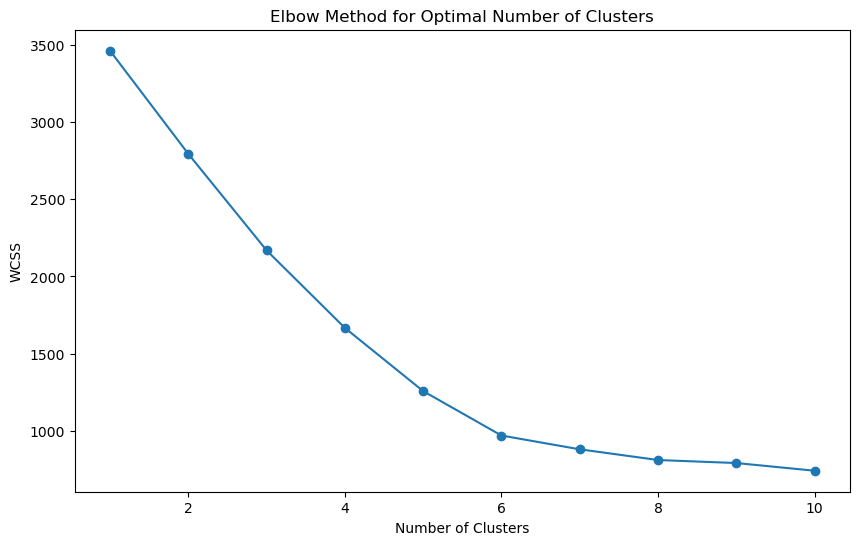

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

*So the Optimal number of Clusters that we get is 9*

In [68]:
kmeans = KMeans(n_clusters=9, random_state=42)
cluster_features['Cluster'] = kmeans.fit_predict(cluster_features_scaled)

In [69]:
cluster_features['Loan_Status']=data['Loan_Status']

In [70]:
cluster_features.groupby(['Cluster'])["Loan_Status"].value_counts(normalize=True)

Cluster  Loan_Status
0        N              1.000000
1        Y              0.827160
         N              0.172840
2        Y              0.714286
         N              0.285714
3        Y              0.781818
         N              0.218182
4        Y              0.666667
         N              0.333333
5        Y              0.719298
         N              0.280702
6        N              0.800000
         Y              0.200000
7        Y              0.744186
         N              0.255814
8        N              0.886364
         Y              0.113636
Name: proportion, dtype: float64

In [71]:
approval_rate = cluster_features.groupby("Cluster")["Loan_Status"].apply(lambda x: (x == "Y").mean())

In [72]:
approval_rate

Cluster
0    0.000000
1    0.827160
2    0.714286
3    0.781818
4    0.666667
5    0.719298
6    0.200000
7    0.744186
8    0.113636
Name: Loan_Status, dtype: float64

In [73]:
cluster_features["Approval_Rate"] = cluster_features["Cluster"].map(approval_rate)



In [74]:
cluster_features["Approval_Rate"].nunique()

9

In [75]:

cluster_features["Approval_Rate_Categorical"] = cluster_features["Approval_Rate"].round(2).astype(str)


In [76]:
cluster_features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents,Cluster,Loan_Status,Approval_Rate,Approval_Rate_Categorical
0,5849,0.0,106.4,360.0,1.0,2,0.0,1,Y,0.827160,0.83
1,4583,1508.0,128.0,360.0,1.0,0,1.0,1,N,0.827160,0.83
2,3000,0.0,66.0,360.0,1.0,2,0.0,1,Y,0.827160,0.83
3,2583,2358.0,120.0,360.0,1.0,2,0.0,1,Y,0.827160,0.83
4,6000,0.0,141.0,360.0,1.0,2,0.0,7,Y,0.744186,0.74
...,...,...,...,...,...,...,...,...,...,...,...
1179,3182,2917.0,161.0,360.0,1.0,2,0.0,1,Y,0.827160,0.83
1198,416,41667.0,350.0,180.0,1.0,2,3.0,6,N,0.200000,0.2
1199,2894,2792.0,155.0,360.0,1.0,0,0.0,1,Y,0.827160,0.83
1200,5703,0.0,128.0,360.0,1.0,2,3.0,7,Y,0.744186,0.74


In [77]:
import plotly.express as px


fig = px.scatter(
    cluster_features,
    x="ApplicantIncome",
    y="LoanAmount",
    color="Approval_Rate_Categorical",  
    color_discrete_sequence=px.colors.qualitative.Dark24,  
    title="Cluster Visualization Based on Applicant Income and Loan Amount",
    labels={"Approval_Rate_Categorical": "Approval Rate"}
)


fig.update_layout(
    legend_title=dict(font=dict(size=12)),  
    legend=dict(
        title="Approval Rate",
        x=1.05,  
        y=1,
        orientation="v",  
    ),
    xaxis_title="Applicant Income",
    yaxis_title="Loan Amount"
)

fig.show()


In [78]:
data['Risk_Probability']=1-cluster_features['Approval_Rate'].round(2)

In [79]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Risk_Probability
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.17
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.17
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.17
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.17
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,Male,No,0,Graduate,Yes,3182,2917.0,161.0,360.0,1.0,Urban,Y,0.17
1198,Female,No,3,Graduate,Yes,416,41667.0,350.0,180.0,NaN,Urban,N,0.80
1199,Male,Yes,0,Not Graduate,Yes,2894,2792.0,155.0,360.0,1.0,Rural,Y,0.17
1200,Male,Yes,3,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y,0.26


**Also we are creating a Column to get information about the Loan Amount to Applicant Income ratio...to help model to find the patterns in between the input and output features**

In [ ]:
cluster_features_impute = cluster_features[columns_to_impute]

# Apply KNN Imputer to the selected columns
cluster_features_imputed = imputer.fit_transform(cluster_features_impute)

# Replace the original columns in the dataframe with the imputed ones
cluster_features[columns_to_impute] = cluster_features_imputed

In [81]:
data[columns_to_impute]=cluster_features[columns_to_impute]

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, 0 to 1208
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             679 non-null    object 
 1   Married            689 non-null    object 
 2   Dependents         692 non-null    float64
 3   Education          692 non-null    object 
 4   Self_Employed      660 non-null    object 
 5   ApplicantIncome    692 non-null    int64  
 6   CoapplicantIncome  692 non-null    float64
 7   LoanAmount         692 non-null    float64
 8   Loan_Amount_Term   692 non-null    float64
 9   Credit_History     692 non-null    float64
 10  Property_Area      692 non-null    object 
 11  Loan_Status        692 non-null    object 
 12  Risk_Probability   692 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 91.9+ KB


# First We will build our Model without feature construction

# Data Preprocessing and Model building

In [414]:
# col=["Total_Income","Average_income"]
# df.drop(columns=col, inplace =True)


In [415]:
# !pip install xgboost

In [416]:
# !pip install lightgbm

In [417]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [418]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("sklearn",sklearn.__version__)

numpy 1.26.4
pandas 2.2.2
sklearn 1.5.1


In [419]:
# pip install -U imbalanced-learn

Now as our Column Applicant Imcome, Co-Applicant Income And Loan Amount has a lot outliers, So we first remove the outliers

Here As the columns were Right skewed so to make the Z-score method more effective we first Normalize the data of the column using Log transformation and then used Z-score method

In [420]:
def remove_outliers_z_score(df, col, threshold=3):
    df[col] = np.log1p(df[col])
    
    mean = df[col].mean()
    std_dev = df[col].std()
    
    df['Z_Score'] = (df[col] - mean) / std_dev
    
    df = df[np.abs(df['Z_Score']) <= threshold]
    
    df.drop(columns=['Z_Score'], inplace=True)
    
    return df

Here We have used Capping using Inter-quantile range

In [421]:
def removing_outLiers_IQR(df,col):
  Q1=df[col].quantile(0.25)
  Q2=df[col].quantile(0.75)
  IQR=Q2-Q1
  MINI=Q1-1.5*IQR
  MAXI=Q2+1.5*IQR
  df[col]=np.where(df[col]<MINI,MINI,np.where(df[col]>MAXI,MAXI,df[col]))

  return df


For Capping:

In [422]:
Outier_col=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
for col in Outier_col:
  df=removing_outLiers_IQR(df,col)

**DO the Z-Score Method**

For Z-Score Method:

In [423]:
Outier_col=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
for col in Outier_col:
  df=remove_outliers_z_score(df,col)

Now Checking the Skewness of the Columns mentioned above

In [424]:
print(df["ApplicantIncome"].skew())
print(df["CoapplicantIncome"].skew())
print(df["LoanAmount"].skew())

0.22463451108802251
-0.19293079747165146
-0.2548477586680605


**Now Let Us Do Train test Split**

In [425]:
X=df.drop(columns=["Loan_Status"])
y=df["Loan_Status"]

In [426]:
y.value_counts()

Loan_Status
Y    795
N    351
Name: count, dtype: int64

In [427]:
y

1       N
2       Y
3       Y
4       Y
5       Y
       ..
1207    Y
1208    Y
1209    Y
1210    Y
1211    N
Name: Loan_Status, Length: 1146, dtype: object

In [428]:
y=y.apply(lambda x: 1 if x=='Y' else 0)
y

1       0
2       1
3       1
4       1
5       1
       ..
1207    1
1208    1
1209    1
1210    1
1211    0
Name: Loan_Status, Length: 1146, dtype: int64

In [429]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

# Base Line Model

In [430]:
dummy_clf = DummyClassifier(strategy='prior')
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.6826086956521739

# Now we will Construct Our Preprocessing Pipeline

* Now as the above Three Columns **Applicant Income, Coapplicant Income, Loan Amount** Are Right skew we will apply Log Transformation on those columns(**At this Moment we are not considering this step**... as we already have transformed the data when I was doing the Z-score method)

* Then we will impute the columns with simple Imputer using Mean/Median strategy

* Then we will scale the columns using standard/Minmaxscaling scaling

In [178]:
numerical_features=X_train.select_dtypes(include=['int','float']).columns.tolist()
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [179]:
# Log_Simple_Imputer_Standard_scaler_NUM_col=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
Simple_Imputer_Standard_scaler_NUM_col=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]

trf1=Pipeline(
    steps=[
        ("Simple Imputer",SimpleImputer(strategy="mean")),
        # ("Standard Scaler",StandardScaler())
        ("MinMax scaling", MinMaxScaler())
    ]
)

Imputation + encoding Transformer

And Inputation + Scaling Transformer

We can See that There are Missing Values in Married, Gender, Dependents,Self_employed, Loan Amount, Loan Amount Term,
Credit History

* We apply Most frequent Categorical Imputer in Married and Gender and dependets, Self_employed

* We will Apply Mean Simple Imputer For  Loan Amount Term as there are Missing Values < 5% and also will do Standard scaling (**AT this moment I am Ignoring this step**)

* Now we will use first KNN Imputer For Credit History, Then we will (**At this moment we are doing MinmaxScaling**) see what to do

* Then we will apply ordinal encoding on Dependents, Self_employed, Education,
Property_Area

* And also we will apply one Hot encoder on on married and Gender

* Now as there is a relation between the classes of the categorical columns Education, Self_Employed, Dependents and Property Area We will do ordinal encoding


In [180]:
# Simple_Imputer_Scaler_NUM_col=["Loan_Amount_Term"]

# trf2=Pipeline(
#     steps=[
#         ("Simple Imputer",SimpleImputer(strategy="median")),
#         ("Standard Scaler",StandardScaler())
#     ]
# )

KNN_Imputer_NUM_col=["Credit_History"]

trf3=Pipeline(
    steps=[
        ("KNN Imputer",KNNImputer(n_neighbors=5,weights="distance")),
        ("MinMaxScaler",MinMaxScaler())
    ]
)

Simple_Imputer_ordinal_CAT_col=["Dependents","Property_Area","Education"]
custom_categories = [
    ["0", "1", "2", "3+"],                # Dependents
    ["Rural", "Semiurban", "Urban"],      # Property_Area
    ["Not Graduate", "Graduate"]          # Education
]

trf4=Pipeline(
    steps=[
        ("Simple Imputer",SimpleImputer(strategy="most_frequent")),
        ("Ordinal Encoder",OrdinalEncoder(categories=custom_categories, handle_unknown="use_encoded_value", unknown_value=-1))
    ]
)

Simple_Imputer_One_Hot_Encoder_CAT_col=["Gender","Married","Self_Employed"]

trf5=Pipeline(
    steps=[
        ("Simple Imputer",SimpleImputer(strategy="most_frequent")),
        ("One Hot Encoder",OneHotEncoder(sparse_output=False, drop="first",handle_unknown="ignore"))

    ]

)



We Have already encoded For the output Column
* Loan Status , replacing 'Y' by 1 and 'N' by 0


Now we can Make Our final ColumnTransformer that we will use for making our pipeline

In [181]:
set_config(display="diagram")


In [182]:
final_preprocessor=ColumnTransformer(
    transformers=[
        ("Log transform + Simple Imputer + Standard Scaling",trf1,Simple_Imputer_Standard_scaler_NUM_col),
        # ("Simple imputer + Standard Scaling ",trf2,Simple_Imputer_Scaler_NUM_col),
        ("KNN Imputer",trf3,KNN_Imputer_NUM_col),
        ("Simple imputer + Ordinal Encoder",trf4,Simple_Imputer_ordinal_CAT_col),
        ("Simple imputer + One Hot Encoder",trf5,Simple_Imputer_One_Hot_Encoder_CAT_col)
    ]
)

In [183]:
X_train__=final_preprocessor.fit_transform(X_train)
X_test__=final_preprocessor.transform(X_test)
print(X_train__.shape)
print(X_test__.shape)


(907, 11)
(227, 11)


In [189]:
file_path = "final_preprocessor.pkl"

# Save the final_preprocessor object using pickle
try:
    with open(file_path, "wb") as file:
        pickle.dump(final_preprocessor, file)
    print(f"final_preprocessor has been successfully saved to {file_path}.")
except Exception as e:
    print(f"Error while saving final_preprocessor: {e}")

final_preprocessor has been successfully saved to final_preprocessor.pkl.


# Model Training

# SMOTE

In [165]:
from sklearn.decomposition import PCA


In [ ]:
def evaluate_smote_predict(classifier,clf_name,param_grid,X_train,X_test,y_train,y_test):
    smote = SMOTE(random_state=42)
    
    

    X_train_res, y_train_res = smote.fit_resample(X_train__, y_train)

    print(pd.Series(y_train).value_counts())

    print('\nAfter smote')
    print(pd.Series(y_train_res).value_counts())

    classifier.fit(X_train_res, y_train_res)

    y_test_pred=classifier.predict(X_test__)

    fig,axs=plt.subplots(1,3)
    fig.set_size_inches(10,4)
    plt.tight_layout()
    axs[0].set_title('Precision-Recall curve')
    axs[1].set_title('ROC curve')
    PrecisionRecallDisplay.from_estimator(classifier,X_test,y_test,ax=axs[0])
    RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=axs[1]);
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=axs[2]);
    print('\n2.Roc-Auc Score(with smote)',roc_auc_score(y_test, y_test_pred))
    print('classification report:\n',classification_report(y_test,y_test_pred))
    print('accuracy for training data:',accuracy_score(y_test,y_test_pred))

    print('\n\n\n')
    start = time.time()

    print('Grid-search CV')
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10, scoring='precision', n_jobs=-1)
    
    from joblib import parallel_backend

    with parallel_backend('threading'):
        grid_search.fit(X_train__, y_train)
    
    end=time.time()
    print("Time taken to train (for gridsearchCV)",end-start)
    
    print('Best parameters:\n', grid_search.best_params_)
    print('Best score (on train set):', grid_search.best_score_)
    
    best_model = grid_search.best_estimator_
    file_name = f'{clf_name}_best_model.pkl'
    with open(file_name, 'wb') as file:
        pickle.dump(best_model, file)

    print("Best model from GridSearchCV has been saved as 'gradient_boosting_best_model.pkl'")
    y_pred_ = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_)

    precision = precision_score(y_test, y_pred_, average='binary')

    recall = recall_score(y_test, y_pred_, average='binary')
    
    roc_auc = roc_auc_score(y_test, y_pred_)

    f1 = f1_score(y_test, y_pred_, average='binary')
    print("After GridSearchCV the best Parameter results\n")
    print(f"{clf_name} - Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, f1: {f1:.3f}, roc_auc_score: {roc_auc:.3f}, Best Params: {grid_search.best_params_}")
    print("Classification report with best parameters:\n", classification_report(y_test, y_pred_))

    

# Parameters

In [167]:
param_grids = {
    "RandomForest": {
        'classifier__criterion': ["gini", "entropy", "log_loss"],
        'classifier__n_estimators': [25,50, 75,100,120],
        "classifier__max_features":[0.25,0.5,0.75,1.0],
        'classifier__max_depth': [None, 6, 10, 15],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    "GradientBoosting": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [2, 3, 4, 5],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    },
    "DecisionTree": {
        'classifier__max_depth': [2, 3, 4, 5, 10],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    "LogisticRegression": {
        'classifier__solver': ['saga'],
        'classifier__penalty': ['elasticnet'],
        'classifier__l1_ratio': [0.25, 0.5, 0.55, 0.6, 0.70, 0.75],
        'classifier__C': [0.01, 0.1, 0.5, 0.7, 1.0, 3.0],
        'classifier__max_iter': [60, 100, 400, 700, 1000]
    },
    "XGBoost": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 4, 5, 6],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    },
    "KNN": {
        'classifier__n_neighbors': [3, 4, 5, 6, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    "SVC": {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__gamma': [0.001, 0.01, 0.1, 1],
        'classifier__kernel': ['linear', 'rbf', 'poly']
    },
    "LightGBM": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 4, 5, 6],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    }
}

# Logistic Regression

In [178]:
logreg_clf = LogisticRegression()
param_grid={'solver':['saga'],'penalty':['elasticnet'],'l1_ratio':[0.25, 0.5, 0.55, 0.6, 0.70, 0.75],'C':[0.01, 0.1, 0.5, 0.7],'max_iter': [60, 100, 400, 700, 1000]}


evaluate_smote_predict(logreg_clf,"LogisticRegression",param_grid,X_train__,X_test__,y_train,y_test)

Loan_Status
1    638
0    278
Name: count, dtype: int64

After smote
Loan_Status
1    638
0    638
Name: count, dtype: int64

2.Roc-Auc Score(with smote) 0.6814414099991275
classification report:
               precision    recall  f1-score   support

           0       0.70      0.45      0.55        73
           1       0.78      0.91      0.84       157

    accuracy                           0.77       230
   macro avg       0.74      0.68      0.70       230
weighted avg       0.76      0.77      0.75       230

accuracy for training data: 0.7652173913043478




Grid-search CV
Time taken to train (for gridsearchCV) 5.1052210330963135
Best parameters:
 {'C': 0.1, 'l1_ratio': 0.25, 'max_iter': 60, 'penalty': 'elasticnet', 'solver': 'saga'}
Best score (on train set): 0.8039606090924657
After GridSearchCV the best Parameter results

LogisticRegression - Accuracy: 0.796, Precision: 0.775, Recall: 0.987, f1: 0.868, roc_auc_score: 0.685, Best Params: {'C': 0.1, 'l1_ratio': 0.25, 'max_it

# Decision Tree

In [179]:
DT=DecisionTreeClassifier()
param_grid={'max_depth': [2, 3, 4, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
        }

evaluate_smote_predict(DT,"DecisionTreeClassifier",param_grid,X_train__,X_test__,y_train,y_test)


Loan_Status
1    638
0    278
Name: count, dtype: int64

After smote
Loan_Status
1    638
0    638
Name: count, dtype: int64

2.Roc-Auc Score(with smote) 0.8658930285315417
classification report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        73
           1       0.91      0.92      0.92       157

    accuracy                           0.89       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.89      0.89      0.89       230

accuracy for training data: 0.8869565217391304




Grid-search CV
Time taken to train (for gridsearchCV) 1.6956219673156738
Best parameters:
 {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score (on train set): 0.8822043931352234
After GridSearchCV the best Parameter results

DecisionTreeClassifier - Accuracy: 0.796, Precision: 0.812, Recall: 0.911, f1: 0.859, roc_auc_score: 0.729, Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_s

# Gradiest Boosting

In [182]:
GB=GradientBoostingClassifier()
param_grid={'n_estimators': [50, 100, 200],
        'max_depth': [2, 3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2]}

evaluate_smote_predict(GB,"GradientBoosting",param_grid,X_train__,X_test__,y_train,y_test)

Loan_Status
1    638
0    278
Name: count, dtype: int64

After smote
Loan_Status
1    638
0    638
Name: count, dtype: int64

2.Roc-Auc Score(with smote) 0.7352761539132711
classification report:
               precision    recall  f1-score   support

           0       0.80      0.53      0.64        73
           1       0.81      0.94      0.87       157

    accuracy                           0.81       230
   macro avg       0.80      0.74      0.75       230
weighted avg       0.81      0.81      0.80       230

accuracy for training data: 0.808695652173913




Grid-search CV
Time taken to train (for gridsearchCV) 57.519702196121216
Best parameters:
 {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
Best score (on train set): 0.9361670269906662
Best model from GridSearchCV has been saved as 'gradient_boosting_best_model.pkl'
After GridSearchCV the best Parameter results

GradientBoosting - Accuracy: 0.913, Precision: 0.920, Recall: 0.955, f1: 0.938, roc_auc_score: 0.889

# SVM

In [171]:
SVM=SVC()
param_grid={'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1],
        'kernel': ['linear', 'rbf', 'poly']}


evaluate_smote_predict(SVM,"Support Vector Machine",param_grid,X_train__,X_test__,y_train,y_test)


Loan_Status
1    638
0    278
Name: count, dtype: int64

After smote
Loan_Status
1    638
0    638
Name: count, dtype: int64

2.Roc-Auc Score(with smote) 0.7180874269260973
classification report:
               precision    recall  f1-score   support

           0       0.64      0.59      0.61        73
           1       0.82      0.85      0.83       157

    accuracy                           0.77       230
   macro avg       0.73      0.72      0.72       230
weighted avg       0.76      0.77      0.76       230

accuracy for training data: 0.7652173913043478




Grid-search CV
Time taken to train (for gridsearchCV) 468.5866074562073
Best parameters:
 {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best score (on train set): 0.8867553341054293
After GridSearchCV the best Parameter results

Support Vector Machine - Accuracy: 0.878, Precision: 0.877, Recall: 0.955, f1: 0.915, roc_auc_score: 0.834, Best Params: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Classification report with best parameter

# LightGBM


In [172]:
LGB=LGBMClassifier()
param_grid={'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.1, 0.2]}

evaluate_smote_predict(LGB,"Light GBM",param_grid,X_train__,X_test__,y_train,y_test)


Loan_Status
1    638
0    278
Name: count, dtype: int64

After smote
Loan_Status
1    638
0    638
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 638, number of negative: 638
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 1276, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

2.Roc-Auc Score(with smote) 0.8886659104790158
classification report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86        73
           1       0.92      0.96      0.94       157

    accuracy                           0.91       230
   macro avg       0.91      0.89      0.90       230
weighted avg       0.91      0.91 

# XGBClassifier

In [173]:
XGB=XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_grid={'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 4, 5, 6],
        'classifier__learning_rate': [0.01, 0.1, 0.2]}

evaluate_smote_predict(XGB,"XGB classifier",param_grid,X_train__,X_test__,y_train,y_test)


Loan_Status
1    638
0    278
Name: count, dtype: int64

After smote
Loan_Status
1    638
0    638
Name: count, dtype: int64

2.Roc-Auc Score(with smote) 0.895515225547509
classification report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        73
           1       0.93      0.96      0.94       157

    accuracy                           0.92       230
   macro avg       0.91      0.90      0.90       230
weighted avg       0.92      0.92      0.92       230

accuracy for training data: 0.9173913043478261




Grid-search CV
Time taken to train (for gridsearchCV) 8.979223728179932
Best parameters:
 {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Best score (on train set): 0.9359814280286562
After GridSearchCV the best Parameter results

XGB classifier - Accuracy: 0.917, Precision: 0.926, Recall: 0.955, f1: 0.940, roc_auc_score: 0.896, Best Params: {'classifier__learning_rate': 0.01

# RandomForest

In [183]:
RF=RandomForestClassifier()
param_grid={'criterion': ["gini", "entropy", "log_loss"],
        'n_estimators': [25,50, 75,100,120],
        "max_features":[0.25,0.5,0.75,1.0],
        'max_depth': [None, 6, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]}

evaluate_smote_predict(RF,"RandomForest classifier",param_grid,X_train__,X_test__,y_train,y_test)



Loan_Status
1    638
0    278
Name: count, dtype: int64

After smote
Loan_Status
1    638
0    638
Name: count, dtype: int64

2.Roc-Auc Score(with smote) 0.8818165954105227
classification report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        73
           1       0.91      0.96      0.93       157

    accuracy                           0.91       230
   macro avg       0.90      0.88      0.89       230
weighted avg       0.91      0.91      0.91       230

accuracy for training data: 0.908695652173913




Grid-search CV


KeyboardInterrupt: 

# Catboost

In [434]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [175]:
from catboost import CatBoostClassifier

In [176]:
cat= CatBoostClassifier()


param_grid={'iterations':[250],
            'learning_rate':[0.2],
            'od_type':['Iter'],
            'verbose':[25],
            'depth':[16],
            'random_seed':[42]}

evaluate_smote_predict(cat,"Catboost classifier",param_grid,X_train__,X_test__,y_train,y_test)



Loan_Status
1    638
0    278
Name: count, dtype: int64

After smote
Loan_Status
1    638
0    638
Name: count, dtype: int64
Learning rate set to 0.011432
0:	learn: 0.6871937	total: 140ms	remaining: 2m 19s
1:	learn: 0.6804095	total: 142ms	remaining: 1m 10s
2:	learn: 0.6744267	total: 143ms	remaining: 47.6s
3:	learn: 0.6684654	total: 145ms	remaining: 36.1s
4:	learn: 0.6629647	total: 147ms	remaining: 29.2s
5:	learn: 0.6572349	total: 149ms	remaining: 24.6s
6:	learn: 0.6507587	total: 150ms	remaining: 21.3s
7:	learn: 0.6445685	total: 152ms	remaining: 18.8s
8:	learn: 0.6394274	total: 153ms	remaining: 16.9s
9:	learn: 0.6328083	total: 154ms	remaining: 15.3s
10:	learn: 0.6270506	total: 156ms	remaining: 14s
11:	learn: 0.6224127	total: 158ms	remaining: 13s
12:	learn: 0.6183076	total: 159ms	remaining: 12.1s
13:	learn: 0.6137003	total: 161ms	remaining: 11.3s
14:	learn: 0.6095480	total: 162ms	remaining: 10.6s
15:	learn: 0.6050431	total: 164ms	remaining: 10.1s
16:	learn: 0.6003778	total: 166ms	remaini

# Balanced RandomForest Classifier

In [177]:
from imblearn.ensemble import BalancedRandomForestClassifier
# Applying balancedRanforest
RBF = BalancedRandomForestClassifier(random_state=42)
RBF.fit(X_train__, y_train)

# Predict test set
y_pred_brf = RBF.predict(X_test__)
y_proba_brf = RBF.predict_proba(X_test__)[:, 1]

fig,axs=plt.subplots(1,3)
fig.set_size_inches(10,4)
#fig.suptitle(f'Name:{clf_name}')
plt.tight_layout()
axs[0].set_title('Precision-Recall curve')
axs[1].set_title('ROC curve')
PrecisionRecallDisplay.from_estimator(RBF,X_test__,y_test,ax=axs[0])
RocCurveDisplay.from_estimator(RBF, X_test__, y_test, ax=axs[1]);
ConfusionMatrixDisplay.from_estimator(RBF, X_test__, y_test, ax=axs[2]);
print('\n2.Roc-Auc Score(with smote)',roc_auc_score(y_test, y_pred_brf))
print('classification report:\n',classification_report(y_test,y_pred_brf))
print('accuracy for training data:',accuracy_score(y_test,y_pred_brf))

X_=X

X_=final_preprocessor.fit_transform(X_)

recall_cv = cross_val_score(RBF, X_, y, cv=10,  n_jobs=-1,scoring=make_scorer(recall_score, average='binary')).mean()

precisionCV= cross_val_score(RBF, X_, y, cv=10,  n_jobs=-1,scoring=make_scorer(precision_score, average='binary')).mean()

f1CV= cross_val_score(RBF, X_, y, cv=10,  n_jobs=-1,scoring=make_scorer(f1_score, average='binary')).mean()

print(f"f1 score :{f1CV}, precision score: {precisionCV}, recall score:{recall_cv}")



2.Roc-Auc Score(with smote) 0.8800715469854289
classification report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83        73
           1       0.93      0.91      0.92       157

    accuracy                           0.89       230
   macro avg       0.87      0.88      0.88       230
weighted avg       0.89      0.89      0.89       230

accuracy for training data: 0.8913043478260869
f1 score :0.9639979637926961, precision score: 0.9871440121060374, recall score:0.9421677215189874


# Voting classifier


2.Roc-Auc Score(with smote) 0.6162639185027246
classification report:
               precision    recall  f1-score   support

           0       0.77      0.27      0.40        63
           1       0.74      0.96      0.83       134

    accuracy                           0.74       197
   macro avg       0.75      0.62      0.62       197
weighted avg       0.75      0.74      0.70       197

accuracy for training data: 0.7411167512690355
f1 score :0.6991781944775007, precision score: 0.7596638766608091, recall score:0.6514705882352941


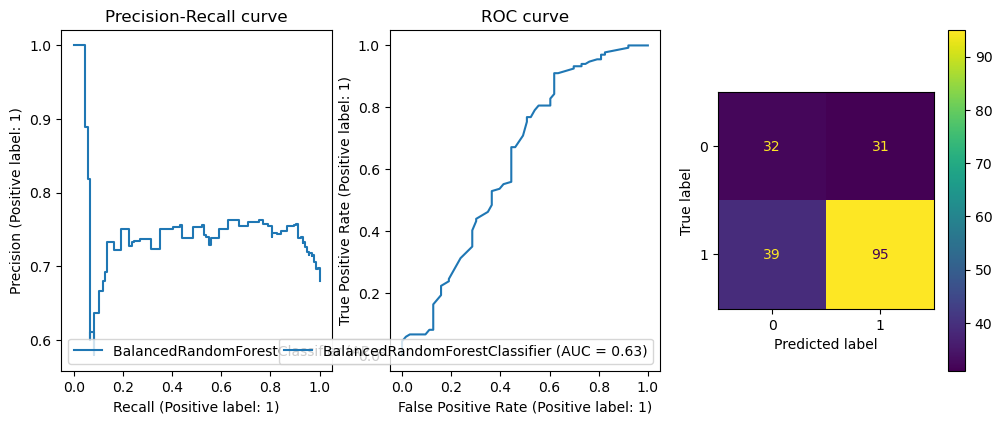

In [439]:
from sklearn.ensemble import VotingClassifier
clf1= LogisticRegression(C=0.1, l1_ratio=0.25, max_iter=60, penalty='elasticnet', solver='saga')
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth= None, min_samples_leaf= 9, min_samples_split= 2)
clf3 = RandomForestClassifier(criterion= 'log_loss', max_depth= 10, max_features= 0.75, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 25)

# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[('LG', clf1), ('dt', clf2), ('rf', clf3)],
    voting='soft'
)

# Train the voting classifier
voting_clf.fit(X_train__, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test__)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# print("Voting Classifier report:\n", classification_report(y_test,y_pred))

fig,axs=plt.subplots(1,3)
fig.set_size_inches(10,4)
#fig.suptitle(f'Name:{clf_name}')
plt.tight_layout()
axs[0].set_title('Precision-Recall curve')
axs[1].set_title('ROC curve')
PrecisionRecallDisplay.from_estimator(RBF,X_test__,y_test,ax=axs[0])
RocCurveDisplay.from_estimator(RBF, X_test__, y_test, ax=axs[1]);
ConfusionMatrixDisplay.from_estimator(RBF, X_test__, y_test, ax=axs[2]);
print('\n2.Roc-Auc Score(with smote)',roc_auc_score(y_test, y_pred))
print('classification report:\n',classification_report(y_test,y_pred))
print('accuracy for training data:',accuracy_score(y_test,y_pred))

X_=X

X_=final_preprocessor.fit_transform(X_)

recall_cv = cross_val_score(RBF, X_, y, cv=10,  n_jobs=-1,scoring=make_scorer(recall_score, average='binary')).mean()

precisionCV= cross_val_score(RBF, X_, y, cv=10,  n_jobs=-1,scoring=make_scorer(precision_score, average='binary')).mean()

f1CV= cross_val_score(RBF, X_, y, cv=10,  n_jobs=-1,scoring=make_scorer(f1_score, average='binary')).mean()

print(f"f1 score :{f1CV}, precision score: {precisionCV}, recall score:{recall_cv}")

In [79]:
import pickle

In [80]:
file_path="E:/Project Loan Prediction/Loan-Approval-Prediction/notebook/pickle_file/GradientBoosting_best_model.pkl"
with open(file_path, 'rb') as file_obj:
        # obj = pickle.load(file_obj)
        model = pickle.load(file_obj)

In [81]:
import pandas as pd

In [184]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,8.597482,8.342125,5.590987,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
1207,Female,No,0,Graduate,No,7.972811,0.000000,4.276666,360.0,1.0,Rural,Y
1208,Male,Yes,3,Graduate,No,8.320448,0.000000,3.713572,180.0,1.0,Rural,Y
1209,Male,Yes,1,Graduate,No,8.996280,5.484797,5.537334,360.0,1.0,Urban,Y
1210,Male,Yes,2,Graduate,No,8.933796,0.000000,5.236442,360.0,1.0,Urban,Y


In [186]:
data.iloc[1207]

Gender                 Female
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          2900
CoapplicantIncome         0.0
LoanAmount               71.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Rural
Loan_Status                 Y
Name: 1207, dtype: object

In [84]:
data

{'Gender': ['Male'],
 'Married': ['Yes'],
 'Dependents': ['1'],
 'Education': ['Not Graduate'],
 'Self_Employed': ['No'],
 'ApplicantIncome': [45.0],
 'CoapplicantIncome': [15.0],
 'LoanAmount': [12800.0],
 'Loan_Amount_Term': [360.0],
 'Credit_History': [0.0],
 'Property_Area': ['Rural']}

In [188]:
data_ = {
    'Gender': ['Female'],
    'Married': ['No'],
    'Dependents': ['0'],
    'Education': ['Graduate'],
    'Self_Employed': ['No'],
    'ApplicantIncome': [2900],
    'CoapplicantIncome': [0.0],
    'LoanAmount': [71.0],
    'Loan_Amount_Term': [360.0],
    'Credit_History': [0.0],
    'Property_Area': ['Rural']
}
teste = pd.DataFrame(data_)

features_processed = final_preprocessor.transform(teste)

# Step 3: Make a prediction
prediction = model.predict(features_processed)

# Step 4: Display the result
print(f"Prediction: {prediction[0]}")


Prediction: 0


# Best Performing Model: Gradient Boosting

Our best-performing model is **Gradient Boosting**, achieving exceptional performance across multiple evaluation metrics:

- **Accuracy**: 0.913  
- **Precision**: 0.920  
- **Recall**: 0.955  
- **F1 Score**: 0.938  
- **ROC-AUC Score**: 0.889  

### Best Hyperparameters:
```json
{
  "learning_rate": 0.2,
  "max_depth": 4,
  "n_estimators": 200
}


Now We will 